# Library Instalment



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import os

from sklearn.preprocessing import OneHotEncoder, LabelEncoder

#machine learning libraries:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.model_selection import cross_val_score, cross_val_predict

#evaluation
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import r2_score,f1_score, precision_score, recall_score
from sklearn.metrics import precision_recall_curve

import warnings
warnings.filterwarnings('ignore')

# 2. Load Data

In [2]:
train_data = pd.read_csv('adult.csv')
test_data = pd.read_csv('adult.test.csv')

In [3]:
col_labels = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status','occupation','relationship',
              'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'income']

train_data.columns = col_labels

In [4]:
# menyamakan kolom train data dengan test data
columns=train_data.columns
test_data.columns=columns

# Concat Two Datasets

In [5]:
# menggabungkan kedua dataset menjadi variabel bernama df
df = pd.concat([train_data, test_data], axis=0, ignore_index=True)

In [6]:
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [7]:
# Memastikan bahwa data tidak mengandung spasi yang tidak perlu pada semua string/object columns
# Remove leading and trailing spaces from all object and string type columns
for col in df.select_dtypes(include=['object', 'string']).columns:
    df[col] = df[col].astype(str).str.strip()

In [8]:
# Verification: Check if spaces have been removed from string columns
print("Sample of workclass column after space removal:")
print(df['workclass'].unique())
print("\nSample of native_country column after space removal:")
print(df['native_country'].unique()[:5])
print("\nSample of marital_status column after space removal:")
print(df['marital_status'].unique())

Sample of workclass column after space removal:
['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov' '?'
 'Self-emp-inc' 'Without-pay' 'Never-worked']

Sample of native_country column after space removal:
['United-States' 'Cuba' 'Jamaica' 'India' '?']

Sample of marital_status column after space removal:
['Never-married' 'Married-civ-spouse' 'Divorced' 'Married-spouse-absent'
 'Separated' 'Married-AF-spouse' 'Widowed']


## (Initial Data Handling) `workclass` and `occupation` column

In [9]:
# Memastikan nilai unik dari kolom workclass
df['workclass'].unique()

array(['State-gov', 'Self-emp-not-inc', 'Private', 'Federal-gov',
       'Local-gov', '?', 'Self-emp-inc', 'Without-pay', 'Never-worked'],
      dtype=object)

In [10]:
# Merubah nilai '?' dengan nilai nan (including ' ?')
df.replace("?", np.nan, inplace=True)

In [11]:
# membuat var data_na untuk cek kolom dengan nilai na
data_na = df.isna().sum()
data_na.drop(data_na[data_na == 0].index).sort_values(ascending=False)

,0
occupation,2809
workclass,2799
native_country,857


In [12]:
# cek jumlah kolom workclass dan occupation yang sama sama bernilai na (.isna)
len(df[df['workclass'].isna() & df['occupation'].isna()])

2799

In [13]:
# cek individu yang ada status bekerja/nilainya('workclass'), tapi jabatannya kosong ('occupation')
df[df['occupation'].isna() & df['workclass'].notna()]

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
5361,18,Never-worked,206359,10th,6,Never-married,NaN,Own-child,White,Male,0,0,40,United-States,<=50K
10845,23,Never-worked,188535,7th-8th,4,Divorced,NaN,Not-in-family,White,Male,0,0,35,United-States,<=50K
14772,17,Never-worked,237272,10th,6,Never-married,NaN,Own-child,White,Male,0,0,30,United-States,<=50K
20337,18,Never-worked,157131,11th,7,Never-married,NaN,Own-child,White,Female,0,0,10,United-States,<=50K
23232,20,Never-worked,462294,Some-college,10,Never-married,NaN,Own-child,Black,Male,0,0,40,United-States,<=50K
32304,30,Never-worked,176673,HS-grad,9,Married-civ-spouse,NaN,Wife,Black,Female,0,0,40,United-States,<=50K
32314,18,Never-worked,153663,Some-college,10,Never-married,NaN,Own-child,White,Male,0,0,4,United-States,<=50K
41345,17,Never-worked,131593,11th,7,Never-married,NaN,Own-child,Black,Female,0,0,20,United-States,<=50K.
44167,20,Never-worked,273905,HS-grad,9,Married-spouse-absent,NaN,Other-relative,White,Male,0,0,35,United-States,<=50K.
46458,18,Never-worked,162908,11th,7,Never-married,NaN,Own-child,White,Male,0,0,35,United-States,<=50K.


In [14]:
df.loc[df['occupation'].isna() & df['workclass'].notna(), 'workclass'].value_counts()

,count
workclass,
Never-worked,10


In [15]:
df[df['workclass']=='Never-worked']= df[df['workclass']=='Never-worked'].fillna('No-occupation')

## (initial Data Handling) `native_country` column

In [16]:
# cek nilai unik pada kolom native_country
df['native_country'].unique()

array(['United-States', 'Cuba', 'Jamaica', 'India', nan, 'Mexico',
       'South', 'Puerto-Rico', 'Honduras', 'England', 'Canada', 'Germany',
       'Iran', 'Philippines', 'Italy', 'Poland', 'Columbia', 'Cambodia',
       'Thailand', 'Ecuador', 'Laos', 'Taiwan', 'Haiti', 'Portugal',
       'Dominican-Republic', 'El-Salvador', 'France', 'Guatemala',
       'China', 'Japan', 'Yugoslavia', 'Peru',
       'Outlying-US(Guam-USVI-etc)', 'Scotland', 'Trinadad&Tobago',
       'Greece', 'Nicaragua', 'Vietnam', 'Hong', 'Ireland', 'Hungary',
       'Holand-Netherlands'], dtype=object)

In [17]:
# cek jumlah (counts) setiap value pada kolom native_country (untuk lima teratas)
df['native_country'].value_counts()[:5]

,count
native_country,
United-States,43831
Mexico,951
Philippines,295
Germany,206
Puerto-Rico,184


In [18]:
# Cek berapa nilai NaN pada kolom 'native_country'
print(f"Number of NaN values in 'native_country' column: {df['native_country'].isna().sum()}")

Number of NaN values in 'native_country' column: 857


In [19]:
# Handling nilai NaN pada native_country diisi dengan nilai modus yaitu 'United-States'
df['native_country'].fillna('United-States', inplace=True)

In [20]:
#sanity check kolom yang masih mengandung nilai NaN
data_na = df.isna().sum()
data_na.drop(data_na[data_na == 0].index).sort_values(ascending=False)

,0
workclass,2799
occupation,2799


In [21]:
#opsi 1 (terbaik): "unknown labeling" -> mencegah kehilangan data yang mungkin valid.
df['workclass'] = df['workclass'].fillna('Unknown')
df['occupation'] = df['occupation'].fillna('Unknown')

In [22]:
# Sanity Check -> nilai NaN pada kolom 'workclass' sudah terisi dengan nilai 'unknown'
df['workclass'].unique() # nan -> unknown

array(['State-gov', 'Self-emp-not-inc', 'Private', 'Federal-gov',
       'Local-gov', 'Unknown', 'Self-emp-inc', 'Without-pay',
       'Never-worked'], dtype=object)

In [23]:
# Sanity Check -> nilai NaN pada kolom 'occupation' sudah terisi dengan nilai 'unknown'
df['occupation'].unique() # nan -> unknown

array(['Adm-clerical', 'Exec-managerial', 'Handlers-cleaners',
       'Prof-specialty', 'Other-service', 'Sales', 'Craft-repair',
       'Transport-moving', 'Farming-fishing', 'Machine-op-inspct',
       'Tech-support', 'Unknown', 'Protective-serv', 'Armed-Forces',
       'Priv-house-serv', 'No-occupation'], dtype=object)

# Exploratory Data Analysis (EDA) & Preprocessing

In [24]:
df.describe(include='all')

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
count,48841.000000,48841,4.884100e+04,48841,48841.000000,48841,48841,48841,48841,48841,48841.000000,48841.000000,48841.000000,48841,48841
unique,NaN,9,NaN,16,NaN,7,16,6,5,2,NaN,NaN,NaN,41,4
top,NaN,Private,NaN,HS-grad,NaN,Married-civ-spouse,Prof-specialty,Husband,White,Male,NaN,NaN,NaN,United-States,<=50K
freq,NaN,33905,NaN,15784,NaN,22379,6172,19716,41762,32649,NaN,NaN,NaN,44688,24720
mean,38.643865,NaN,1.896634e+05,NaN,10.078152,NaN,NaN,NaN,NaN,NaN,1079.089720,87.504105,40.422391,NaN,NaN
std,13.710511,NaN,1.056050e+05,NaN,2.570961,NaN,NaN,NaN,NaN,NaN,7452.093748,403.008483,12.391571,NaN,NaN
min,17.000000,NaN,1.228500e+04,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN
25%,28.000000,NaN,1.175490e+05,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
50%,37.000000,NaN,1.781420e+05,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
75%,48.000000,NaN,2.376460e+05,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,NaN


In [25]:
# information of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48841 entries, 0 to 48840
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48841 non-null  int64 
 1   workclass       48841 non-null  object
 2   fnlwgt          48841 non-null  int64 
 3   education       48841 non-null  object
 4   education_num   48841 non-null  int64 
 5   marital_status  48841 non-null  object
 6   occupation      48841 non-null  object
 7   relationship    48841 non-null  object
 8   race            48841 non-null  object
 9   sex             48841 non-null  object
 10  capital_gain    48841 non-null  int64 
 11  capital_loss    48841 non-null  int64 
 12  hours_per_week  48841 non-null  int64 
 13  native_country  48841 non-null  object
 14  income          48841 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


## Missing Value Checking

In [26]:
# Final Sanity checking: any missing values before Data Exploration -> clear tidak ada missing value lagi dalam dataframe
df.isna().sum()

,0
age,0
workclass,0
fnlwgt,0
education,0
education_num,0
marital_status,0
occupation,0
relationship,0
race,0
sex,0


In [27]:
# Fill missing values in native_country column with mode (United States)
df['native_country'].fillna(' United-States', inplace=True)

In [28]:
# Check native_country unique values
df['native_country'].unique()

array(['United-States', 'Cuba', 'Jamaica', 'India', 'Mexico', 'South',
       'Puerto-Rico', 'Honduras', 'England', 'Canada', 'Germany', 'Iran',
       'Philippines', 'Italy', 'Poland', 'Columbia', 'Cambodia',
       'Thailand', 'Ecuador', 'Laos', 'Taiwan', 'Haiti', 'Portugal',
       'Dominican-Republic', 'El-Salvador', 'France', 'Guatemala',
       'China', 'Japan', 'Yugoslavia', 'Peru',
       'Outlying-US(Guam-USVI-etc)', 'Scotland', 'Trinadad&Tobago',
       'Greece', 'Nicaragua', 'Vietnam', 'Hong', 'Ireland', 'Hungary',
       'Holand-Netherlands'], dtype=object)

In [29]:
# Check what type of NaN values exist
nan_count = df['native_country'].isna().sum()
print(f"Rows with NaN: {nan_count}")

# Show some rows with NaN
print("\nSample NaN values:")
print(df[df['native_country'].isna()]['native_country'].head(10))

# Try fillna again with explicit value
df.loc[df['native_country'].isna(), 'native_country'] = ' United-States'
print(f"\nNaN count after loc fill: {df['native_country'].isna().sum()}")

Rows with NaN: 0

Sample NaN values:
Series([], Name: native_country, dtype: object)

NaN count after loc fill: 0


In [30]:
# Final Sanity checking: any missing values before Data Exploration -> clear tidak ada missing value lagi dalam dataframe
df.isna().sum()

,0
age,0
workclass,0
fnlwgt,0
education,0
education_num,0
marital_status,0
occupation,0
relationship,0
race,0
sex,0


# Data Exploration

## Income

### (Data Handling)

In [31]:
df['income'].unique()

array(['<=50K', '>50K', '<=50K.', '>50K.'], dtype=object)

In [32]:
# karena menggabungkan 2 df, kolom income dilakukan handling -> agar konsisten
df.replace({'income':{">50K.":">50K" , "<=50K.":"<=50K"}},inplace=True)

In [33]:
# Sanity Check: sudah terdapat dua kategori di kolom income (Y)
df['income'].unique()

array(['<=50K', '>50K'], dtype=object)

In [34]:
# Handling var target (y): menjadi format biner (0 dan 1)
df['income'] = df['income'].replace({'<=50K':0,'>50K':1})

In [35]:
# Sanity Check: kolom income sudah berubah menjadi biner (0 dan 1)
df['income'].unique()

array([0, 1])

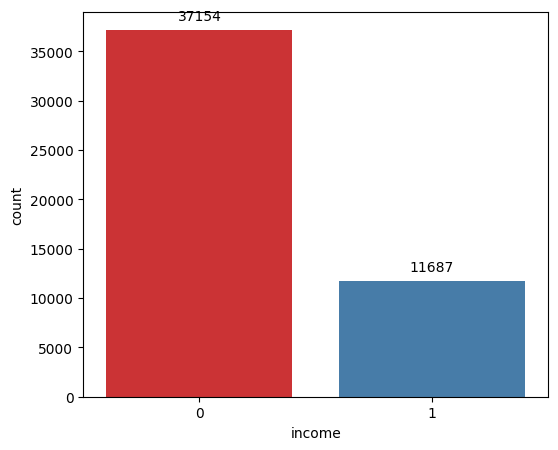

In [36]:
# Checking label counts
Workclass_data=df['income'].value_counts()
order= list(Workclass_data.index)

plt.figure(figsize=(6,5))
# Fix 1: Replace undefined 'r_color' with a standard color string
plot= sns.countplot(data=df, x='income', order=order, palette='Set1')

# Fix 2: Define add_value_labels function
def add_value_labels(ax, spacing=5):
    """Add labels to the end of each bar in a bar chart.

    Arguments:
        ax (matplotlib.axes.Axes): The matplotlib axes object.
        spacing (int): The distance between the end of the bar and the label.
    """
    for rect in ax.patches:
        # Get X and Y placement of label from rect.
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        # Number of points between bar and label. Change to your liking.
        space = spacing
        # Vertical alignment for positive values
        va = 'bottom'

        # If value of bar is negative: Place label below bar
        if y_value < 0:
            space *= -1
            va = 'top'

        # Annotate the bar
        ax.annotate(f'{y_value:.0f}',                     # Use `y_value` to format label.
                    (x_value, y_value),         # Place label at end of the bar.
                    xytext=(0, space),          # Shift label by `space` in points.
                    textcoords="offset points", # Interpret `xytext` as offset in points.
                    ha='center',                # Horizontally center label.
                    va=va,                      # Vertically align label.
                    zorder=2) # Ensure label is on top of plot elements.

add_value_labels(plot)
plt.show()

In [37]:
print('-> Total No. of records : {}\n'.format(len(df)))

print('-> Number of people making more that >50K : {}%\n'.format(
    round((len(df[df['income']==1])/48841)*100, 2)))

print('-> Number of people making less than or equal to <=50K : {}%'.format(
    round((len(df[df['income']==0])/48841)*100, 2)))

-> Total No. of records : 48841

-> Number of people making more that >50K : 23.93%

-> Number of people making less than or equal to <=50K : 76.07%


### (Insight)

***Data Tidak Seimbang Terungkap dalam Analisis Pendapatan***
- Keterangan:
  - Income 0: Pendapatan <=50K
  - Income 1: Pendapatan >50K
- Analisis distribusi pada target column mengungkap temuan signifikan mengenai ketidakseimbangan data. Tercatat bahwa jumlah individu dengan pendapatan tahunan `kurang dari 50K mencapai 76,07%.`
- Sebaliknya, jumlah orang yang menghasilkan `lebih dari 50K hanya sebesar 23,93%.`
- Dengan angka-angka ini, sangat jelas bahwa dataset yang digunakan dalam studi kasus ini berada dalam kondisi `unbalanced`.
- Kondisi ini sering kali memerlukan perhatian khusus dalam pemodelan machine learning untuk memastikan hasil yang akurat dan adil.

## Age

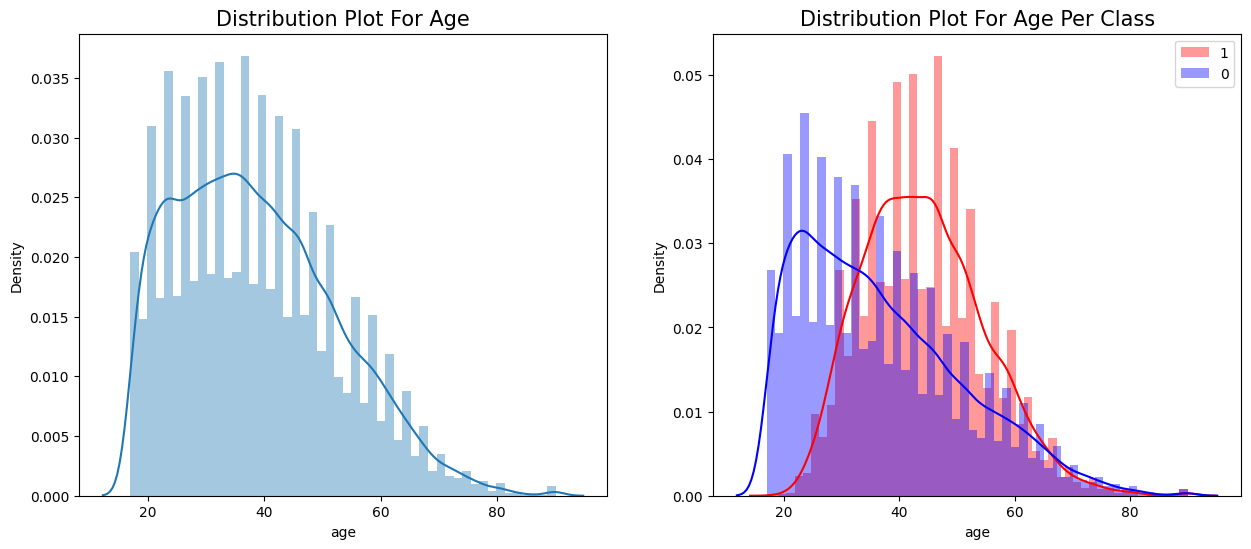

In [38]:
# Distribution plot for age column
plt.figure(figsize=[15,6])
plt.subplot(1,2,1)
sns.distplot(df['age'])
plt.title('Distribution Plot For Age', fontsize = 15)

# Distribution plot for age per class
plt.subplot(1,2,2)
sns.distplot(df[df['income']==1]['age'], label='1', color='red')
sns.distplot(df[df['income']==0]['age'], label='0', color='blue')
plt.legend()
plt.title('Distribution Plot For Age Per Class', fontsize = 15)
plt.show()

### (Insight)

***Usia dan Pendapatan dari Analisis Data***

- `Distribusi Usia Secara Umum: Plot Kiri (Distribusi Plot Untuk Usia)` menunjukkan bahwa sebagian besar individu dalam dataset berusia antara 20 hingga 50 tahun, dengan puncaknya terlihat di sekitar usia 35-40 tahun.Distribusi ini cenderung miring ke kanan (right-skewed), yang berarti terdapat lebih banyak individu usia muda atau paruh baya dibandingkan dengan lansia dalam data tersebut.

- `Usia Berdasarkan Kelas Pendapatan: Plot Kanan (Distribusi Plot Untuk Usia Per Kelas)` membagi populasi menjadi dua kelompok pendapatan: `kelas 0 (pendapatan <= 50K), warna biru/ungu` dan `kelas 1 (pendapatan > 50K), warna merah/merah muda.`

- `Kelas Berpenghasilan Rendah (pendapatan <= 50K)`: Kelompok ini didominasi oleh individu yang lebih muda, dengan puncaknya jelas terlihat pada usia sekitar 25-an. Density curve biru menunjukkan konsentrasi tertinggi di usia awal dewasa.

- `Kelas Berpenghasilan Tinggi (pendapatan > 50K)`: Kelompok ini memiliki distribusi yang berbeda, dengan puncaknya bergeser ke kanan, yaitu pada usia sekitar 40-an. Density curve merah menunjukkan bahwa pendapatan tinggi lebih umum terjadi pada individu yang lebih tua dan lebih mapan.

- `Kesimpulan Utama`: Individu berpenghasilan tinggi cenderung lebih tua secara signifikan dibandingkan dengan individu berpenghasilan rendah. Seiring bertambahnya usia hingga sekitar 40-an, peluang seseorang untuk menghasilkan lebih dari $50K meningkat, dan kemudian menurun setelah usia pensiun.

## Workclass

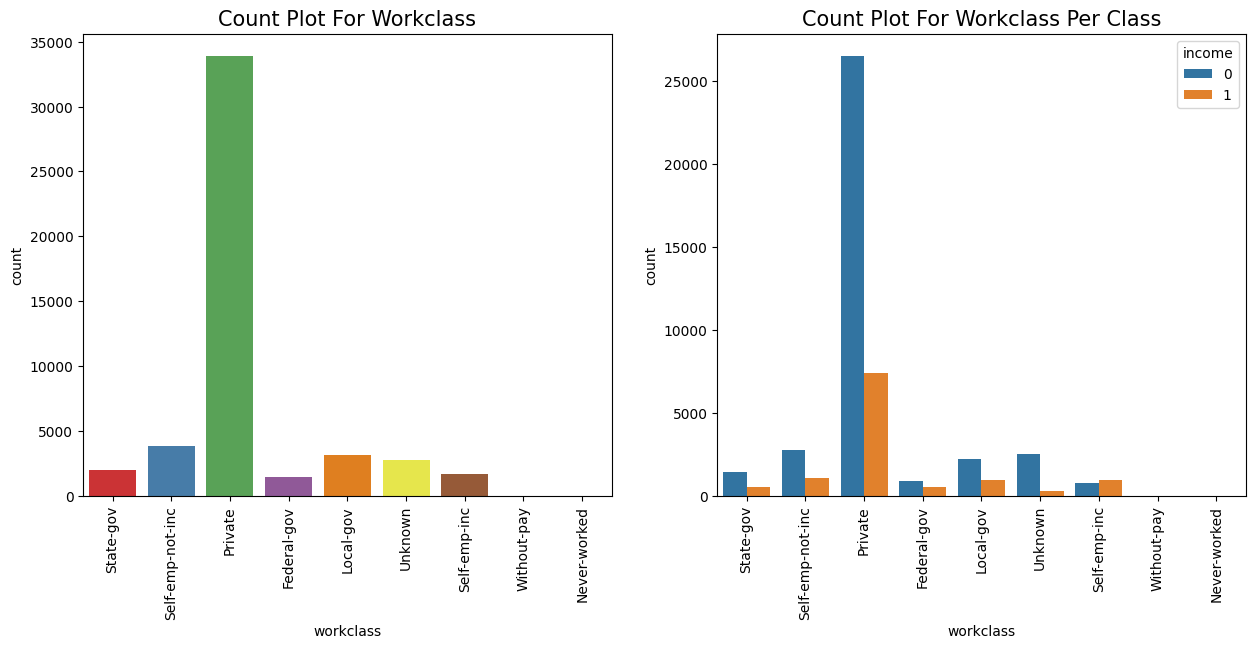

In [39]:
# Countplot for workclass column
plt.figure(figsize=[15,6])
plt.subplot(1,2,1)
# Baris ini yang diubah: menambahkan hue='workclass'
sns.countplot(data=df, x='workclass', hue='workclass', palette='Set1', legend=False)
plt.title("Count Plot For Workclass", fontsize = 15)
plt.xticks(rotation=90)

# Countplot for workclass per class
plt.subplot(1,2,2)
sns.countplot(data=df, x='workclass', hue='income')
plt.title("Count Plot For Workclass Per Class", fontsize = 15)
plt.xticks(rotation=90)
plt.show()

### (Insight)

***Distribusi Kelas Kerja (Workclass Distribution)***

Analisis plot sebelah kiri menunjukkan sebaran umum populasi berdasarkan sektor kerja:
- `Dominasi Sektor Swasta:` Kategori `Private (Swasta)` secara signifikan paling dominan, dengan lebih dari 30.000 titik data.
- `Minoritas:` Kategori seperti `Without-pay (Tanpa Bayaran)` dan `Never-worked (Tidak Pernah Bekerja)` sangat jarang, masing-masing hanya memiliki kurang dari 100 titik data.
- `Pemerintahan:` Pekerja di Local-gov (Pemerintah Lokal), State-gov (Pemerintah Provinsi/Negara Bagian), dan Federal-gov (Pemerintah Pusat)tersebar cukup merata, sekitar 2.000 hingga 3.000 data di setiap kategori.
- `Tidak Diketahui (Unknown):` Terdapat sekitar 2.000 data dengan status workclass yang tidak diketahui (Unknown).

---

***Distribusi Kelas Kerja per Pendapatan (Distribution of Workclass per Income)***
Plot sebelah kanan membandingkan jumlah individu dengan `pendapatan rendah (0 untuk <=50K)` dan `tinggi (1 untuk > 50K)` di setiap kategori `pekerjaan`:
- `Sektor Swasta:` Meskipun secara numerik dominan, proporsi pencari nafkah berpenghasilan tinggi `(high-income earners, diwakili warna oranye)` di sektor Private secara visual kecil relatif terhadap total bar biru => Mayoritas pekerja sektor swasta berpenghasilan rendah (low-income).
- `Rasio 2 kelas penghasilan:` Kategori Self-emp-inc (Self-Employed Legal Entity atau Wiraswasta Berbadan Hukum) memiliki rasio penghasilan tinggi terhadap rendah terbaik. Federal-gov juga menunjukkan rasio yang baik.
- `Penghasilan Rendah Tertentu:` Kategori Without-pay dan Never-worked secara ekspektasi didominasi oleh penghasilan rendah (hanya terlihat bar biru).
---
- Secara keseluruhan, jelas terlihat bahwa workclass memiliki `hubungan yang kuat` dengan tingkat pendapatan (income level), menjadikannya fitur yang sangat berguna untuk pemodelan.

## Education and Education Number

In [40]:
Education_data=df['education'].value_counts()
order1= list(Education_data.index)

# Corrected column name from 'educationnum' to 'education_num'
EducationNum_data=df['education_num'].value_counts()
order2= list(EducationNum_data.index)

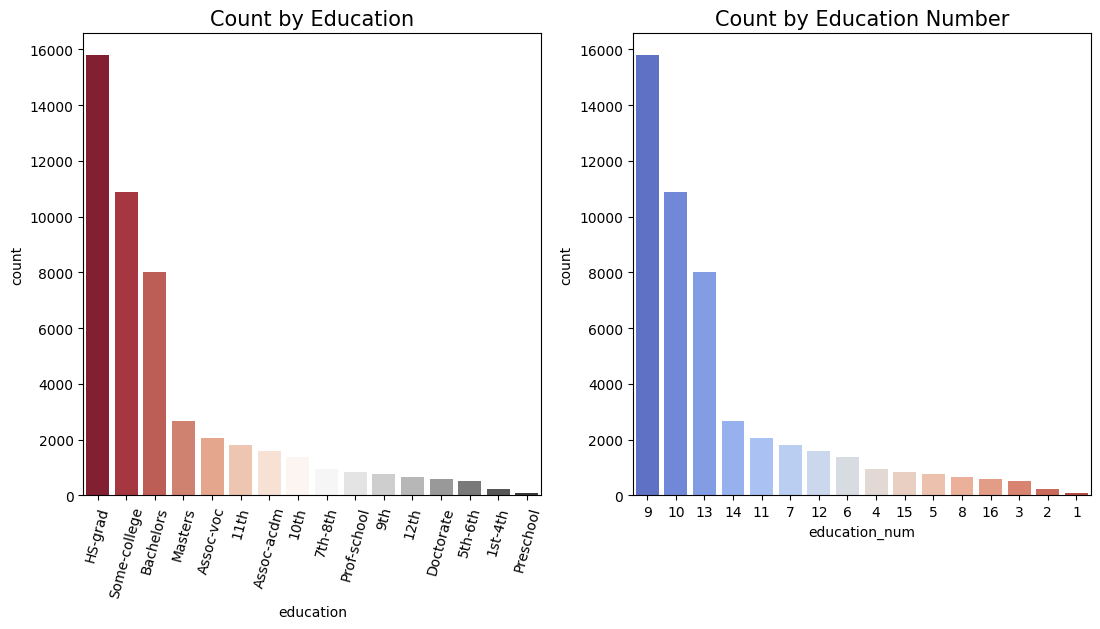

In [41]:
plt.figure(figsize=(13,6))

# Plot the count bar plot
plt.subplot(1,2,1)
plot1= sns.countplot(data=df, x='education', order=order1, palette = 'RdGy')
plt.title('Count by Education', fontsize=15)
plt.xticks(rotation=75);

plt.subplot(1,2,2)
plot2= sns.countplot(data=df, x='education_num', order=order2, palette = 'coolwarm')
plt.title('Count by Education Number', fontsize=15);

In [42]:
# sanity check: make sure bahwa 2 kolom diatas benar2 identik
# sehingga bisa dilakukan droping ke salah satu kolom tsb
education_classes = train_data['education'].unique()
for educ_class in education_classes:
    print("{}, the Education Number is {}".
          format(educ_class, train_data[train_data['education'] == educ_class]['education_num'].unique()))

 Bachelors, the Education Number is [13]
 HS-grad, the Education Number is [9]
 11th, the Education Number is [7]
 Masters, the Education Number is [14]
 9th, the Education Number is [5]
 Some-college, the Education Number is [10]
 Assoc-acdm, the Education Number is [12]
 Assoc-voc, the Education Number is [11]
 7th-8th, the Education Number is [4]
 Doctorate, the Education Number is [16]
 Prof-school, the Education Number is [15]
 5th-6th, the Education Number is [3]
 10th, the Education Number is [6]
 1st-4th, the Education Number is [2]
 Preschool, the Education Number is [1]
 12th, the Education Number is [8]


### (Insight)

***Analisis Grafik***
  - "Count by Education" (Kiri): Grafik ini menggunakan label kategorikal (education) untuk tingkat pendidikan. Tingkat yang paling umum adalah "HS-grad" (lulusan SMA), diikuti oleh "Some-college" (pernah kuliah tapi belum lulus) dan "Bachelors" (Sarjana).
  - "Count by Education Number" (Kanan): Grafik ini memvisualisasikan data yang sama tetapi menggunakan representasi numerik (education_num), di mana setiap angka (dari 1 hingga 16) mewakili tingkat pendidikan tertentu, dengan angka yang lebih tinggi menunjukkan pendidikan yang lebih tinggi. Distribusi visualnya identik dengan grafik di sebelah kiri, menunjukkan bahwa kedua kolom tersebut pada dasarnya berisi informasi yang sama dalam format yang berbeda.
  - Insight utamanya adalah mayoritas individu dalam dataset ini adalah lulusan sekolah menengah (HS-grad) atas atau memiliki pendidikan tinggi non-gelar ("Some-college", "Assoc-voc", dll.), sementara jumlah orang dengan gelar master atau doktor relatif lebih sedikit.

### (Data Handling)

In [43]:
# education & education number column are just the same, so I am dropping education number column.
df.drop(labels='education_num', axis=1, inplace=True)

## Gender

Text(0.5, 1.0, 'Countplot for Gender Per Class')

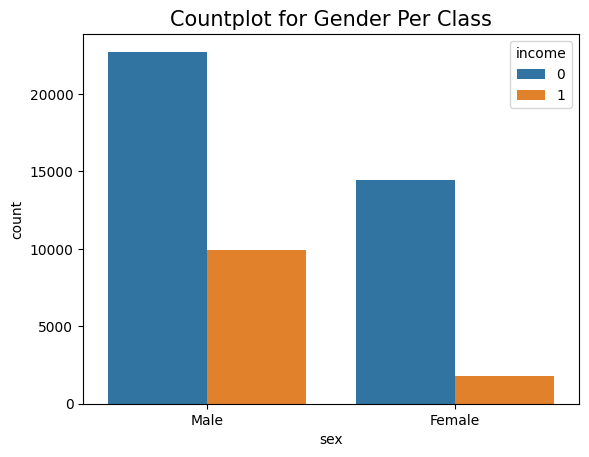

In [44]:
# Count Plot For Gender Per Class
sns.countplot(x='sex' ,data=df, hue='income')
plt.title("Countplot for Gender Per Class", fontsize = 15)

### (Insight)

***Distribusi Gender Secara Umum***

Secara keseluruhan, dataset ini didominasi oleh individu berjenis kelamin Male (Pria), dengan jumlah sekitar dua kali lipat lebih banyak dibandingkan Female (Wanita). Proporsi `pria` dalam data mencapai `sekitar 67%`, sedangkan `wanita` `sekitar 33%. `

---

***Distribusi Pendapatan Berdasarkan Gender***
Analisis lebih mendalam berdasarkan kelas pendapatan mengungkapkan kesenjangan yang signifikan:
- `Pria Berpenghasilan Tinggi:` Terdapat jumlah pria yang jauh lebih besar dalam kategori berpenghasilan tinggi (income 1) dibandingkan wanita. Sekitar 10.000 pria menghasilkan lebih dari 50K per tahun.
- `Wanita Berpenghasilan Tinggi:` Sebaliknya, jumlah wanita dalam kategori berpenghasilan tinggi sangat sedikit, jauh di bawah 2.000 orang.
- `Mayoritas Berpenghasilan Rendah:` Mayoritas besar dari populasi wanita berada di kategori berpenghasilan rendah (income 0), begitu pula dengan mayoritas pria, meskipun pria memiliki jumlah absolut yang lebih tinggi di kedua kategori.
- `Kesimpulan Utama:` Data ini secara visual menunjukkan adanya `gender pay gap (kesenjangan upah gender)` yang substansial dalam sampel sensus ini => Peluang untuk mencapai pendapatan tinggi secara signifikan lebih besar bagi individu berjenis kelamin pria dalam dataset ini.


## Maritial Status

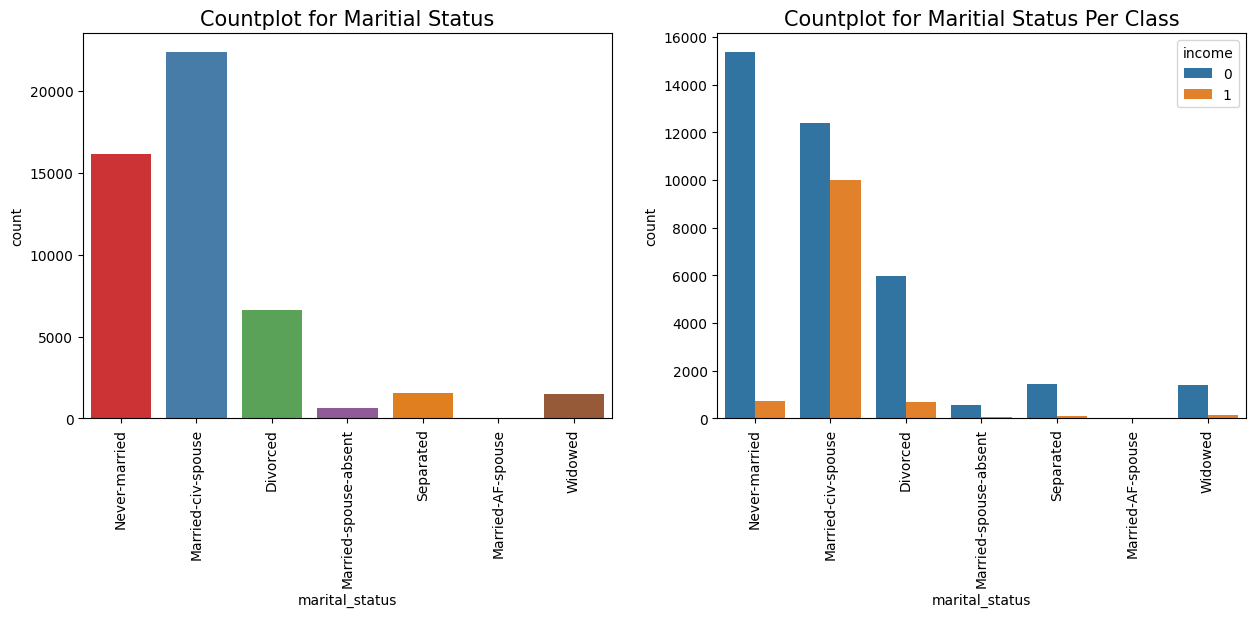


 --Value Counts-- 

marital_status
Married-civ-spouse       22379
Never-married            16116
Divorced                  6633
Separated                 1530
Widowed                   1518
Married-spouse-absent      628
Married-AF-spouse           37
Name: count, dtype: int64


In [45]:
# Countplot for Maritial Status
plt.figure(figsize=[15,5])
plt.subplot(1,2,1)
sns.countplot(x='marital_status', data=df, palette = 'Set1') # Changed to use data=df and x='marital_status'
plt.title("Countplot for Maritial Status", fontsize = 15)
plt.xticks(rotation=90)

# Countplot for Maritial Status Per Class
plt.subplot(1,2,2)
sns.countplot(x='marital_status', hue='income', data=df) # Corrected to use data=df, x, and hue as column names
plt.title("Countplot for Maritial Status Per Class", fontsize = 15)
plt.xticks(rotation=90)
plt.show()

print('\n --Value Counts-- \n')
print(df['marital_status'].value_counts())

### (Insight)

***Countplot Status Perkawinan (Kiri)***
Grafik ini menunjukkan distribusi total individu berdasarkan status perkawinan mereka dalam kumpulan data.
  - Kelompok "married" (menikah, yang terdiri dari `Married-civ-spouse` dan `Married-AF-spouse`) adalah yang paling banyak, dengan jumlah lebih dari 20.000 orang.
  - Kelompok "never married" (belum pernah menikah, penggolongan kelompok tunggal) menempati posisi kedua, dengan sekitar 16.000 orang.
  - Kelompok "prev married" (sebelumnya menikah, yang terdiri dari `Divorced`, `Separated` dan `Widowed`) adalah yang paling sedikit, sekitar 10.000 orang.

***Countplot Status Perkawinan Per Kelas (Kanan)***
Grafik ini membagi status perkawinan berdasarkan kelas pendapatan: income 0 (pendapatan lebih rendah, kemungkinan <=50K per tahun) dan income 1 (pendapatan lebih tinggi, kemungkinan >50K per tahun).
  - "never married": Sebagian besar berada di kelas pendapatan 0, dengan sangat sedikit yang berada di kelas pendapatan 1.
  - "married": Walaupun mayoritas masih di kelas pendapatan 0, proporsi individu di kelas pendapatan 1 jauh lebih tinggi dibandingkan dengan kelompok lain (sekitar 10.000 orang). Hal ini menunjukkan korelasi positif antara status menikah dan kemungkinan memiliki pendapatan tinggi dalam dataset ini.
  - "prev married": Mirip dengan kelompok "never married", sebagian besar berada di kelas pendapatan 0, dengan jumlah yang sangat kecil di kelas pendapatan 1.

---

- Kesimpulan utamanya adalah bahwa dalam dataset ini, status menikah ("married") adalah kategori yang paling umum dan memiliki kemungkinan tertinggi untuk mencapai kelas pendapatan yang lebih tinggi dibandingkan dengan status perkawinan lainnya.


### (Data Handling)

In [46]:
# Data Handling: Transforming Maritial Status column with new value
# Handle both versions with and without leading spaces
df['marital_status'] = df['marital_status'].str.replace('Married-civ-spouse', 'married', regex=False)
df['marital_status'] = df['marital_status'].str.replace('Married-AF-spouse', 'married', regex=False)
df['marital_status'] = df['marital_status'].str.replace('Married-spouse-absent', 'prev married', regex=False)
df['marital_status'] = df['marital_status'].str.replace('Divorced', 'prev married', regex=False)
df['marital_status'] = df['marital_status'].str.replace('Separated', 'prev married', regex=False)
df['marital_status'] = df['marital_status'].str.replace('Widowed', 'prev married', regex=False)
df['marital_status'] = df['marital_status'].str.replace('Never-married', 'never married', regex=False)

In [47]:
# Display the distribution of marital_status after data handling
print("New distribution of marital_status after grouping:")
print(df['marital_status'].value_counts())
print("\nUnique values:")
print(df['marital_status'].unique())

New distribution of marital_status after grouping:
marital_status
married          22416
never married    16116
prev married     10309
Name: count, dtype: int64

Unique values:
['never married' 'married' 'prev married']


## Race

Text(0.5, 1.0, 'Countplot for Race Per Class')

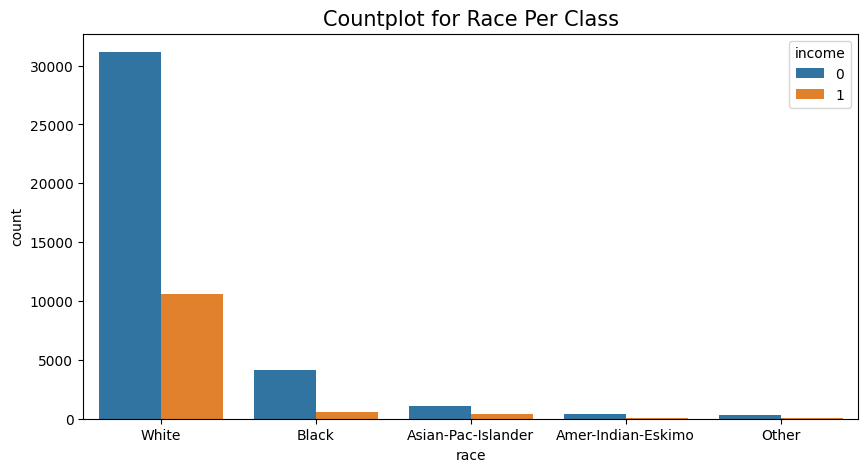

In [48]:
plt.figure(figsize=[10,5])
sns.countplot(x='race', hue='income', data=df)
plt.title('Countplot for Race Per Class', fontsize = 15)

### (Insight)
***Distribusi Ras Secara Umum***

Analisis plot menunjukkan bahwa dataset didominasi secara signifikan oleh satu kategori ras, yaitu White (Kulit Putih), yang mencakup sekitar 86% dari total responden. Kategori lain seperti Black (Kulit Hitam), Asian-Pac-Islander (Asia Pasifik/Kepulauan), Amer-Indian-Eskimo (Indian Amerika/Eskimo), dan Other (Lainnya) memiliki jumlah data yang jauh lebih sedikit.

---

***Distribusi Pendapatan Berdasarkan Ras***
Analisis berdasarkan kelas pendapatan mengungkapkan kesenjangan yang substansial:
- `Peluang Pendapatan Tinggi (high-income):` Kategori White memiliki jumlah individu berpenghasilan tinggi tertinggi secara absolut (lebih dari 10.000 orang). Selain itu, Asian-Pac-Islander menunjukkan rasio pendapatan tinggi terhadap rendah yang relatif baik dibandingkan dengan ras lainnya.
- `Mayoritas Berpenghasilan Rendah (low-income):` Mayoritas besar individu dalam kategori Black, Amer-Indian-Eskimo, dan Other berada di kelas pendapatan rendah (income 0). Sangat sedikit dari mereka yang mencapai pendapatan tinggi (income 1).
- `Kesimpulan Utama:` Individu berkulit putih atau Asia Pasifik secara signifikan lebih mungkin menghasilkan lebih dari $50K per tahun dibandingkan dengan ras lainnya dalam dataset ini. Hal ini menyoroti adanya bias historis atau sosio-ekonomi yang tercermin dalam data sensus.

## Hours per week

Text(0.5, 1.0, 'Distribution plot for hours per week')

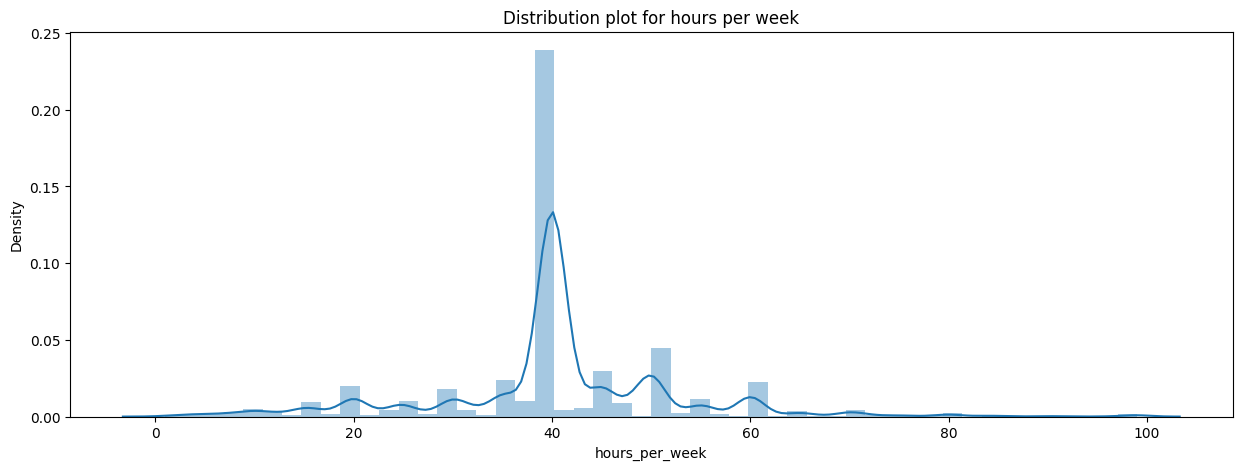

In [49]:
# Distribution plot for hours per week column
plt.figure(figsize=[15,5])
sns.distplot(df['hours_per_week'])
plt.title('Distribution plot for hours per week', fontsize = 12)

### (Insight)

***Distribusi Jam Kerja Secara Umum***
Analisis plot ini mengungkapkan pola yang sangat terpusat dan signifikan:
- `Puncak Dominan di 40 Jam:` Puncak tertinggi yang sangat tajam pada density terjadi tepat di angka 40 jam per minggu pada sumbu horizontal (hours_per_week). Ini mengindikasikan bahwa bekerja selama 40 jam adalah standar atau norma bagi mayoritas responden dalam dataset.
- `Pola Mayoritas:` Sebagian besar individu bekerja dalam kisaran 35 hingga 50 jam per minggu.
- `Pola Minoritas:` Terdapat puncak-puncak yang lebih kecil (local maxima) di sekitar 20 jam, 50-60 jam, dan 80 jam per minggu. Hal ini menunjukkan adanya kelompok yang bekerja paruh waktu atau, sebaliknya, bekerja lembur secara signifikan.
- `Distribusi Miring/Skewed:` Distribusi keseluruhan miring ke kanan (right-skewed), dengan ekor panjang yang membentang hingga 100 jam per minggu, tetapi sebagian besar data terfokus di sekitar puncak 40 jam.
- `Kesimpulan Utama:` Data ini dengan kuat menggarisbawahi norma kerja 40 jam per minggu, yang mencakup mayoritas responden, sementara kelompok lain bekerja paruh waktu atau lembur dalam jumlah yang lebih kecil.


## Native Country

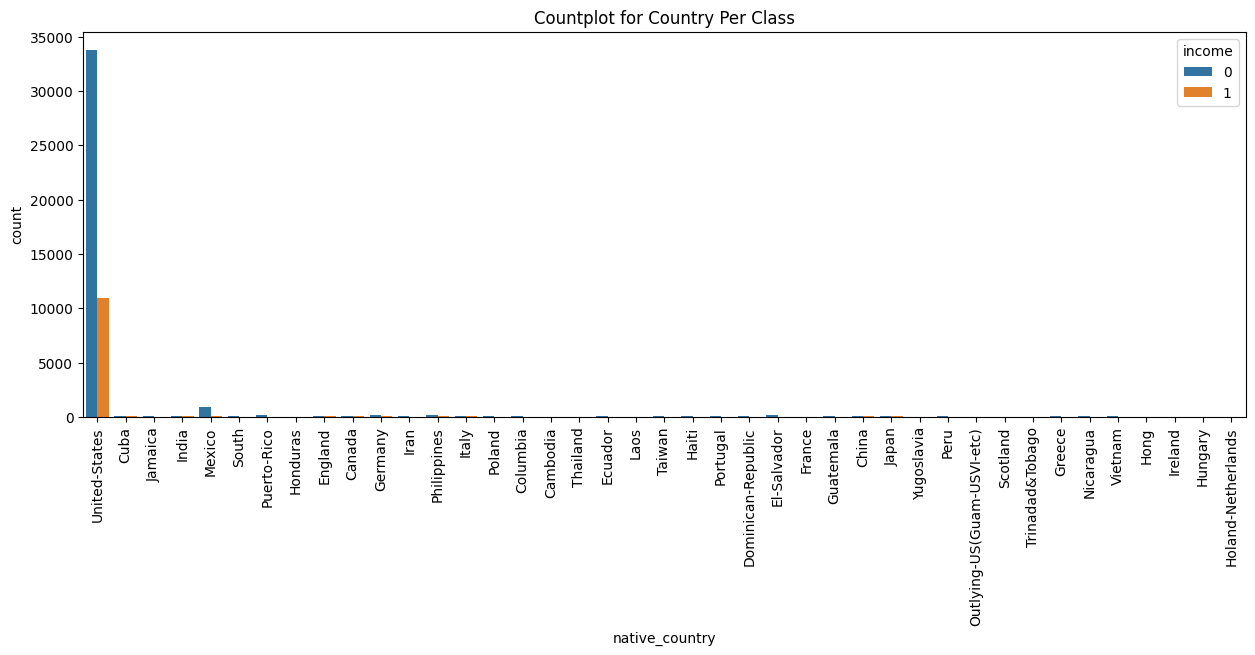


 --Value Counts-- 

native_country
United-States                 44688
Mexico                          951
Philippines                     295
Germany                         206
Puerto-Rico                     184
Canada                          182
El-Salvador                     155
India                           151
Cuba                            138
England                         127
China                           122
South                           115
Jamaica                         106
Italy                           105
Dominican-Republic              103
Japan                            92
Guatemala                        88
Poland                           87
Vietnam                          86
Columbia                         85
Haiti                            75
Portugal                         67
Taiwan                           65
Iran                             59
Greece                           49
Nicaragua                        49
Peru                        

In [50]:
plt.figure(figsize=[15,5])
sns.countplot(x='native_country',hue='income', data=df)
plt.title('Countplot for Country Per Class', fontsize = 12)
plt.xticks(rotation=90)
plt.show()

print('\n --Value Counts-- \n')
print(df['native_country'].value_counts())

print('\n-----------------------------------')
print('{}% people belong from united states.'
      .format(round(len(df[df['native_country']=='United-States'])/48841*100,2)))

print('{}% people belong from other country.'
      .format(round(len(df[df['native_country']!='United-States'])/48841*100,2)))

### (Insight)
***Mayoritas Data Berasal dari Amerika Serikat, Feature Negara Dioptimalkan***

- Analisis terhadap dataset sensus menunjukkan adanya ketidakseimbangan geografis yang signifikan dalam fitur negara asal `(native_country)`.
- Dominasi Amerika Serikat: Dari hasil analisis, 91,5% individu dalam data berasal dari United States, sementara hanya 8,5% yang berasal dari total 41 negara lainnya.
- Penyederhanaan Fitur: Karena jumlah negara lain yang sangat beragam dan jumlah datanya yang sedikit, disarankan untuk menyederhanakan fitur ini. Transformasi nilai dilakukan dengan mengubah fitur tersebut menjadi dua kategori saja: United States atau Other (Lainnya), untuk meningkatkan efisiensi pemodelan.
- Langkah ini merupakan bagian dari proses Feature Engineering untuk memastikan kualitas data yang lebih baik untuk machine learning.

### (Data Handling)

In [51]:
# Data Handling: Transforming native country column with value as either United States or Other.
countries = df['native_country'].unique()[1:]
df['native_country'] = df['native_country'].replace(to_replace=countries, value='Other')

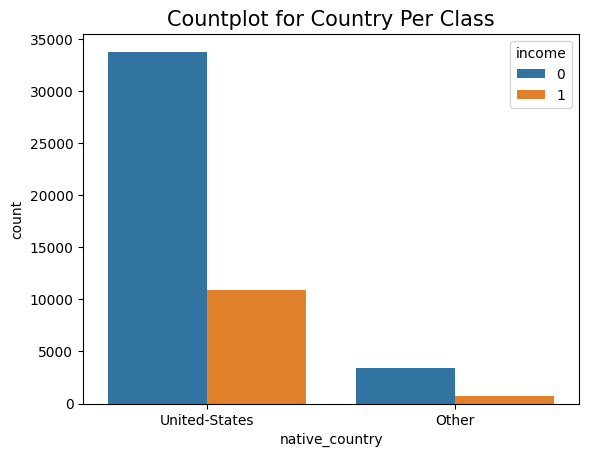

In [52]:
# Sanity Check after Data Handling
# Countplot for Country Per Class
sns.countplot(x='native_country', hue='income', data=df)
plt.title('Countplot for Country Per Class', fontsize = 15)
plt.show()

## Analyze Capital Gain and Capital Loss Distribution


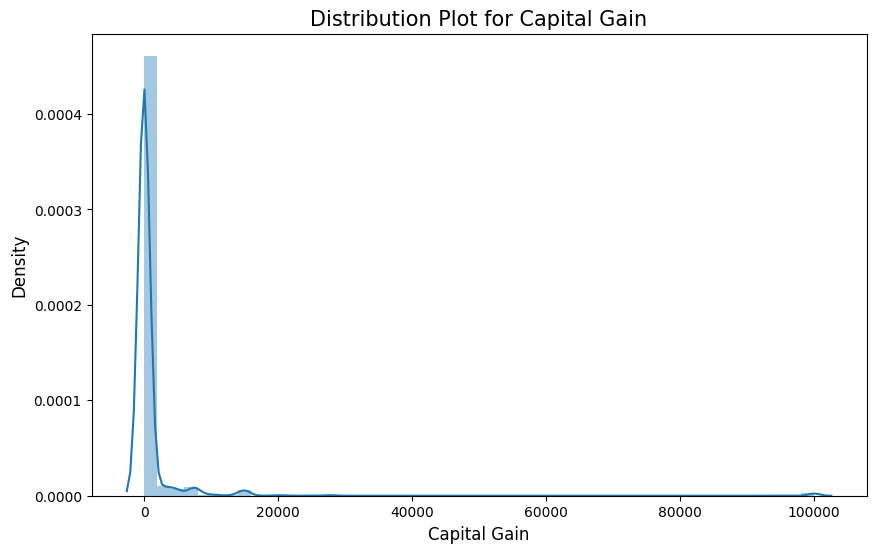

Number of entries with 0 capital gain: 44806
Percentage of entries with 0 capital gain: 91.74%


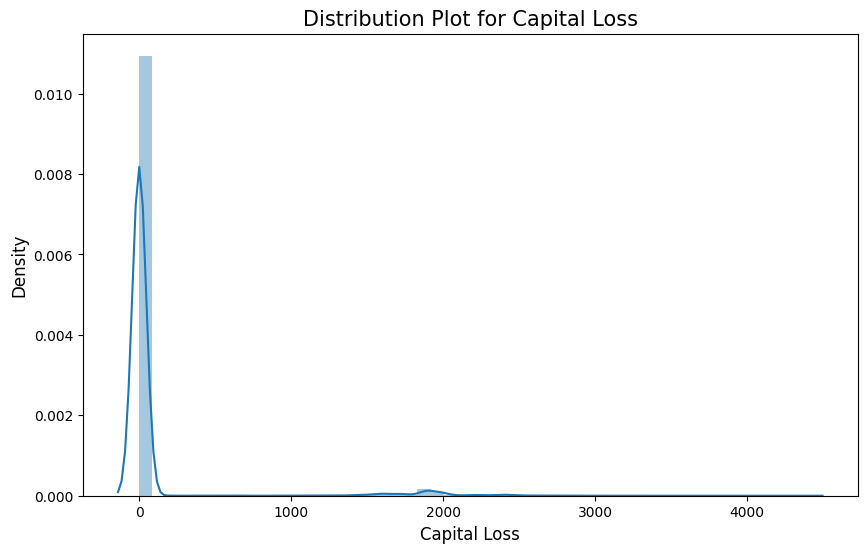

Number of entries with 0 capital loss: 46559
Percentage of entries with 0 capital loss: 95.33%


In [53]:
plt.figure(figsize=[10, 6])
sns.distplot(df['capital_gain'])
plt.title('Distribution Plot for Capital Gain', fontsize=15)
plt.xlabel('Capital Gain', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.show()

# Calculate the number of zero values in capital_gain
zero_capital_gain = (df['capital_gain'] == 0).sum()

# Calculate the percentage of zero values
total_entries = len(df)
percentage_zero = (zero_capital_gain / total_entries) * 100

print(f"Number of entries with 0 capital gain: {zero_capital_gain}")
print(f"Percentage of entries with 0 capital gain: {percentage_zero:.2f}%")

plt.figure(figsize=[10, 6])
sns.distplot(df['capital_loss'])
plt.title('Distribution Plot for Capital Loss', fontsize=15)
plt.xlabel('Capital Loss', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.show()

# Calculate the number of zero values in capital_loss
zero_capital_loss = (df['capital_loss'] == 0).sum()

# Calculate the percentage of zero values
total_entries = len(df)
percentage_zero_loss = (zero_capital_loss / total_entries) * 100

print(f"Number of entries with 0 capital loss: {zero_capital_loss}")
print(f"Percentage of entries with 0 capital loss: {percentage_zero_loss:.2f}%")

### (Insight)

***Interpretasi Plot Distribusi Capital Gain***
- `Distribusi Sangat Miring (Skewed):` Plot menunjukkan distribusi yang sangat miring ke kanan (positively skewed). Puncak tertinggi (moda) berada di titik 0, yang menunjukkan bahwa sebagian besar data terkonsentrasi pada nilai capital gain terendah, yaitu nol.
- `Mayoritas Entri adalah Nol:` "Percentage of entries with capital gain: 91.74%". Ini berarti lebih dari sembilan puluh persen kasus dalam dataset tersebut tidak mencatat adanya keuntungan modal (capital gain).
- `Keuntungan Modal Positif Jarang Terjadi:` Hanya sebagian kecil entri (sekitar 8.26%) yang memiliki nilai capital gain positif. Hal ini terlihat dari "ekor panjang" kurva yang memanjang ke kanan, menunjukkan adanya beberapa nilai keuntungan modal yang lebih tinggi, namun sangat jarang terjadi dan dengan kepadatan (density) yang sangat rendah.
- `Nilai Outlier:` Beberapa nilai yang sangat tinggi (mencapai 100000) bertindak sebagai outlier, menarik ekor distribusi ke kanan.
- `Secara keseluruhan,` data menunjukkan bahwa dalam konteks dataset ini, memperoleh keuntungan modal adalah kejadian yang relatif jarang bagi entri individu.

---

***Interpretasi Plot Distribusi Capital Loss***
- `Distribusi Sangat Miring (Skewed):` Plot ini menunjukkan distribusi yang sangat miring ke kanan (positively skewed). Kepadatan data tertinggi berada di nilai 0 pada sumbu X, menunjukkan bahwa nilai kerugian modal yang paling umum adalah nol.
- `Mayoritas Entri adalah Nol:` "Percentage of entries with 0 capital loss: 95.33%". Ini berarti bahwa lebih dari sembilan puluh lima persen entri dalam dataset tidak mencatat adanya kerugian modal.
- `Kerugian Modal Positif Jarang Terjadi:` Hanya sebagian kecil (sekitar 4.67%) yang memiliki kerugian modal positif. Ini diwakili oleh "ekor panjang" kurva yang membentang ke kanan, menunjukkan bahwa nilai kerugian yang lebih tinggi jarang terjadi dan memiliki kepadatan yang sangat rendah.
- `Nilai Outlier:` Meskipun tidak ada label sumbu X yang tinggi, ekor distribusi menunjukkan adanya beberapa nilai kerugian yang lebih besar, namun jarang muncul dalam data.
- `Secara keseluruhan,` data menunjukkan bahwa, dalam konteks dataset ini, mengalami kerugian modal yang signifikan adalah kejadian yang relatif jarang.

### (Data Handling)

***Create Binary Capital Features***

Create two new binary columns, `has_capital_gain` (1 if `capital_gain > 0`, 0 otherwise) and `has_capital_loss` (1 if `capital_loss > 0`, 0 otherwise), and add them to the `df` DataFrame.


In [54]:
import numpy as np

df['has_capital_gain'] = pd.Series(np.where(df['capital_gain'] > 0, 1, 0), index=df.index).astype('object')
df['has_capital_loss'] = pd.Series(np.where(df['capital_loss'] > 0, 1, 0), index=df.index).astype('object')

# Now that the new columns are created, drop the original ones
df.drop(['capital_gain', 'capital_loss'], axis=1, inplace=True)

print("DataFrame with new binary capital features (as object type) and original columns dropped:")
df.head()

DataFrame with new binary capital features (as object type) and original columns dropped:


,age,workclass,fnlwgt,education,marital_status,occupation,relationship,race,sex,hours_per_week,native_country,income,has_capital_gain,has_capital_loss
0,39,State-gov,77516,Bachelors,never married,Adm-clerical,Not-in-family,White,Male,40,United-States,0,1,0
1,50,Self-emp-not-inc,83311,Bachelors,married,Exec-managerial,Husband,White,Male,13,United-States,0,0,0
2,38,Private,215646,HS-grad,prev married,Handlers-cleaners,Not-in-family,White,Male,40,United-States,0,0,0
3,53,Private,234721,11th,married,Handlers-cleaners,Husband,Black,Male,40,United-States,0,0,0
4,28,Private,338409,Bachelors,married,Prof-specialty,Wife,Black,Female,40,Other,0,0,0


# Feature selection

## Dealing with Categorical Variables

In [55]:
# Data Types of the categorical columns
print("Data Types of Categorical Columns:")
print("="*50)
print(df[['relationship', 'race', 'sex', 'native_country']].dtypes)
print("\n" + "="*50)
print("\nDetailed Information:")
for col in ['relationship', 'race', 'sex', 'native_country']:
    print(f"\n{col}:")
    print(f"  Data Type: {df[col].dtype}")
    print(f"  Number of Unique Values: {df[col].nunique()}")
    print(f"  Is Categorical: {df[col].dtype == 'object'}")

Data Types of Categorical Columns:
relationship      object
race              object
sex               object
native_country    object
dtype: object


Detailed Information:

relationship:
  Data Type: object
  Number of Unique Values: 6
  Is Categorical: True

race:
  Data Type: object
  Number of Unique Values: 5
  Is Categorical: True

sex:
  Data Type: object
  Number of Unique Values: 2
  Is Categorical: True

native_country:
  Data Type: object
  Number of Unique Values: 2
  Is Categorical: True


In [56]:
# Convert the four columns from string to object type
columns_to_convert = ['relationship', 'race', 'sex', 'native_country']
for col in columns_to_convert:
    df[col] = df[col].astype('object')

print("Columns converted to object type:")
print(df[columns_to_convert].dtypes)
print("\nVerification - New Data Types:")
print("="*50)
for col in columns_to_convert:
    print(f"{col}: {df[col].dtype}")

Columns converted to object type:
relationship      object
race              object
sex               object
native_country    object
dtype: object

Verification - New Data Types:
relationship: object
race: object
sex: object
native_country: object


In [57]:
# Categorical features
cat_df = df.select_dtypes(include=['object']) # categorical data -> type:object
num_df = df.select_dtypes(include=['int64']) # numerical data -> type:integer

# Categorical column with their unique value
for i in cat_df.columns:
    print("{} : {} \n".format(i, cat_df[i].unique()))

workclass : ['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov'
 'Unknown' 'Self-emp-inc' 'Without-pay' 'Never-worked'] 

education : ['Bachelors' 'HS-grad' '11th' 'Masters' '9th' 'Some-college' 'Assoc-acdm'
 'Assoc-voc' '7th-8th' 'Doctorate' 'Prof-school' '5th-6th' '10th'
 '1st-4th' 'Preschool' '12th'] 

marital_status : ['never married' 'married' 'prev married'] 

occupation : ['Adm-clerical' 'Exec-managerial' 'Handlers-cleaners' 'Prof-specialty'
 'Other-service' 'Sales' 'Craft-repair' 'Transport-moving'
 'Farming-fishing' 'Machine-op-inspct' 'Tech-support' 'Unknown'
 'Protective-serv' 'Armed-Forces' 'Priv-house-serv' 'No-occupation'] 

relationship : ['Not-in-family' 'Husband' 'Wife' 'Own-child' 'Unmarried' 'Other-relative'] 

race : ['White' 'Black' 'Asian-Pac-Islander' 'Amer-Indian-Eskimo' 'Other'] 

sex : ['Male' 'Female'] 

native_country : ['United-States' 'Other'] 

has_capital_gain : [1 0] 

has_capital_loss : [0 1] 



In [58]:
# Display columns in cat_df and num_df variables
print("="*60)
print("CATEGORICAL VARIABLES (cat_df)")
print("="*60)
print(f"\nNumber of columns: {len(cat_df.columns)}")
print(f"\nColumn names:\n{list(cat_df.columns)}")
print(f"\nColumn details:\n{cat_df.columns.tolist()}")

print("\n" + "="*60)
print("NUMERICAL VARIABLES (num_df)")
print("="*60)
print(f"\nNumber of columns: {len(num_df.columns)}")
print(f"\nColumn names:\n{list(num_df.columns)}")
print(f"\nColumn details:\n{num_df.columns.tolist()}")

print("\n" + "="*60)
print("SUMMARY")
print("="*60)
print(f"Total categorical columns: {len(cat_df.columns)}")
print(f"Total numerical columns: {len(num_df.columns)}")
print(f"Total columns: {len(cat_df.columns) + len(num_df.columns)}")

CATEGORICAL VARIABLES (cat_df)

Number of columns: 10

Column names:
['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country', 'has_capital_gain', 'has_capital_loss']

Column details:
['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country', 'has_capital_gain', 'has_capital_loss']

NUMERICAL VARIABLES (num_df)

Number of columns: 4

Column names:
['age', 'fnlwgt', 'hours_per_week', 'income']

Column details:
['age', 'fnlwgt', 'hours_per_week', 'income']

SUMMARY
Total categorical columns: 10
Total numerical columns: 4
Total columns: 14


## Encoding Categorical Variables

In [59]:
# Step 1: Label Encode the 'sex' column
le_sex = LabelEncoder()
df['sex'] = le_sex.fit_transform(df['sex'])

print("Sex column encoding:")
print(f"Original values: {['Male', 'Female']}")
print(f"Encoded values: {le_sex.transform(['Male', 'Female'])}")
print(f"\nSex column after encoding:\n{df['sex'].unique()}")
print(f"Data type: {df['sex'].dtype}")

Sex column encoding:
Original values: ['Male', 'Female']
Encoded values: [1 0]

Sex column after encoding:
[1 0]
Data type: int64


In [60]:
# Step 2: OneHotEncode the remaining categorical columns (excluding 'sex')
# Columns to be one-hot encoded
ohe_columns = ['workclass', 'education', 'marital_status', 'occupation', 'relationship',
               'race', 'native_country', 'has_capital_gain', 'has_capital_loss']

# Inisialisasi OneHotEncoder dengan sparse_output=False untuk mendapatkan array yang padat (dense).
ohe = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

# Fit and transform the categorical columns
ohe_encoded = ohe.fit_transform(df[ohe_columns])

# Create a DataFrame with the encoded features
ohe_feature_names = ohe.get_feature_names_out(ohe_columns)
ohe_df = pd.DataFrame(ohe_encoded, columns=ohe_feature_names)

print("OneHotEncoder applied to columns:")
print(ohe_columns)
print(f"\nNumber of new features created: {ohe_df.shape[1]}")
print(f"\nFirst few encoded feature names:\n{list(ohe_feature_names[:10])}")
print(f"\nShape of one-hot encoded data: {ohe_df.shape}")

OneHotEncoder applied to columns:
['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'native_country', 'has_capital_gain', 'has_capital_loss']

Number of new features created: 61

First few encoded feature names:
['workclass_Federal-gov', 'workclass_Local-gov', 'workclass_Never-worked', 'workclass_Private', 'workclass_Self-emp-inc', 'workclass_Self-emp-not-inc', 'workclass_State-gov', 'workclass_Unknown', 'workclass_Without-pay', 'education_10th']

Shape of one-hot encoded data: (48841, 61)


In [61]:
# Step 3: Combine all features (numerical + encoded categorical + label encoded sex)
# Numerical features
X_numerical = df[['age', 'fnlwgt', 'hours_per_week']].reset_index(drop=True)

# Label encoded sex
X_sex = pd.DataFrame({'sex': df['sex'].values})

# Combine all features
X_encoded = pd.concat([X_numerical, X_sex, ohe_df], axis=1)

# Target variable (income)
y = df['income']

print("="*60)
print("FINAL ENCODED DATASET")
print("="*60)
print(f"\nShape of X_encoded (features): {X_encoded.shape}")
print(f"Shape of y (target): {y.shape}")
print(f"\nFeature columns ({X_encoded.shape[1]}):")
print(f"\nNumerical features (3):")
print(list(X_numerical.columns))
print(f"\nLabel-encoded feature (1):")
print(['sex'])
print(f"\nOneHotEncoded features ({ohe_df.shape[1]}):")
print(f"First 10: {list(ohe_feature_names[:10])}")
print(f"Last 5: {list(ohe_feature_names[-5:])}")

print(f"\nFirst few rows of encoded data:")
print(X_encoded.head())

FINAL ENCODED DATASET

Shape of X_encoded (features): (48841, 65)
Shape of y (target): (48841,)

Feature columns (65):

Numerical features (3):
['age', 'fnlwgt', 'hours_per_week']

Label-encoded feature (1):
['sex']

OneHotEncoded features (61):
First 10: ['workclass_Federal-gov', 'workclass_Local-gov', 'workclass_Never-worked', 'workclass_Private', 'workclass_Self-emp-inc', 'workclass_Self-emp-not-inc', 'workclass_State-gov', 'workclass_Unknown', 'workclass_Without-pay', 'education_10th']
Last 5: ['native_country_United-States', 'has_capital_gain_0', 'has_capital_gain_1', 'has_capital_loss_0', 'has_capital_loss_1']

First few rows of encoded data:
   age  fnlwgt  hours_per_week  sex  workclass_Federal-gov  \
0   39   77516              40    1                    0.0   
1   50   83311              13    1                    0.0   
2   38  215646              40    1                    0.0   
3   53  234721              40    1                    0.0   
4   28  338409              40   

## Feature Scaling

In [62]:
from sklearn.preprocessing import StandardScaler

# X_encoded and y are expected to be available from previous steps (cell 9aca19d8)
# Re-create correlation_matrix and final_features to define X and y
# This section is added to ensure X and y are defined if preceding cells were not executed.
# In a typical run, these would be defined in earlier cells.

# Combine X_encoded and y into a single DataFrame for correlation calculation (from cell 9066b611)
correlation_data = X_encoded.copy()
correlation_data['income'] = y
# Calculate the full correlation matrix
correlation_matrix = correlation_data.corr()

# Drop features with correlation < 0.03 to reduce noise (from cell 4cb4576b)
# Get correlation with income (absolute values)
income_correlation = abs(correlation_matrix['income'])
# Identify features with correlation < 0.03 (excluding income itself)
low_correlation_threshold = income_correlation < 0.03
low_correlation_features = income_correlation[low_correlation_threshold].index.tolist()
# Remove 'income' from the list if it exists
if 'income' in low_correlation_features:
    low_correlation_features.remove('income')

# Create final_features by dropping low correlation columns
final_features = X_encoded.drop(columns=low_correlation_features, errors='ignore')

# Assign X and y as intended for this cell (from cell cbc26333)
X = final_features.copy()
y = y # y is already the target variable

# Reset indices to ensure consistency
X = X.reset_index(drop=True)
y = y.reset_index(drop=True)

# Dealing with Numerical Columns -> Apply StandardScaler only to numerical columns in X
numerical_cols = ['age', 'hours_per_week']
scaler = StandardScaler()

# Create X_scaled by copying X and then scaling the numerical columns in place
X_scaled = X.copy()
X_scaled[numerical_cols] = scaler.fit_transform(X_scaled[numerical_cols])

print("="*70)
print("FEATURE SCALING - STANDARDSCALER")
print("="*70)
print(f"\nNumerical columns scaled: {numerical_cols}")
print(f"\nX shape before scaling: {X.shape}")
print(f"X_scaled shape after scaling: {X_scaled.shape}")
print(f"\nComparison of 'age' column (first 5 rows):")
print(f"\nOriginal X['age']:")
print(X['age'].head())
print(f"\nScaled X_scaled['age']:")
print(X_scaled['age'].head())
print(f"\nStatistics of scaled 'age' column:")
print(X_scaled['age'].describe())
print("="*70)

FEATURE SCALING - STANDARDSCALER

Numerical columns scaled: ['age', 'hours_per_week']

X shape before scaling: (48841, 47)
X_scaled shape after scaling: (48841, 47)

Comparison of 'age' column (first 5 rows):

Original X['age']:
0    39
1    50
2    38
3    53
4    28
Name: age, dtype: int64

Scaled X_scaled['age']:
0    0.025976
1    0.828288
2   -0.046962
3    1.047100
4   -0.776337
Name: age, dtype: float64

Statistics of scaled 'age' column:
count    4.884100e+04
mean    -1.213310e-16
std      1.000010e+00
min     -1.578649e+00
25%     -7.763367e-01
50%     -1.198994e-01
75%      6.824130e-01
max      3.745787e+00
Name: age, dtype: float64


In [63]:
# Verify the encoding results
print("\n" + "="*60)
print("ENCODING VERIFICATION SUMMARY")
print("="*60)
print(f"\nTotal samples: {X_encoded.shape[0]}")
print(f"Total features: {X_encoded.shape[1]}")
print(f"  - Numerical features: 3 (age, fnlwgt, hours_per_week)")
print(f"  - Label-encoded feature: 1 (sex)")
print(f"  - OneHotEncoded features: {ohe_df.shape[1]}")

print(f"\nTarget variable distribution:")
print(y.value_counts())
print(f"\nData types in X_encoded:")
print(X_encoded.dtypes.value_counts())

print(f"\nData ready for machine learning model training!")
print(f"\nX_encoded shape: {X_encoded.shape}")
print(f"y shape: {y.shape}")


ENCODING VERIFICATION SUMMARY

Total samples: 48841
Total features: 65
  - Numerical features: 3 (age, fnlwgt, hours_per_week)
  - Label-encoded feature: 1 (sex)
  - OneHotEncoded features: 61

Target variable distribution:
income
0    37154
1    11687
Name: count, dtype: int64

Data types in X_encoded:
float64    61
int64       4
Name: count, dtype: int64

Data ready for machine learning model training!

X_encoded shape: (48841, 65)
y shape: (48841,)


In [64]:
import joblib
import pandas as pd
import numpy as np

# X_encoded merupakan hasil dari OHE (One-Hot Encoding) dan label encoding, sementara y adalah variabel target.

# Hitung matriks korelasi untuk SEMUA fitur yang sudah di-encode` terlebih dahulu untuk mengidentifikasi fitur dengan korelasi rendah
correlation_data = X_encoded.copy()
correlation_data['income'] = y

# Calculate correlation matrix
correlation_matrix = correlation_data.corr()

# Identify features with correlation < 0.03 (excluding income itself)
low_correlation_threshold = abs(correlation_matrix['income']) < 0.03
low_correlation_features = abs(correlation_matrix['income'])[low_correlation_threshold].index.tolist()

# Remove 'income' from the list if it exists, as it's the target
if 'income' in low_correlation_features:
    low_correlation_features.remove('income')

# Create final_features by dropping low correlation columns from X_encoded
final_features = X_encoded.drop(columns=low_correlation_features, errors='ignore')

# 'X' is now 'final_features' (the features used for model training after selection)
X = final_features.copy()

# Hitung korelasi absolut setiap feature di X dengan y
# Catatan: y diambil dari original df (DataFrame), yang urutannya sudah aligned (selaras) dengan X_encoded dan final_features.
correlation_with_income = X.corrwith(y).abs()

# Aggregate correlations based on original conceptual features
aggregated_correlations = {}

# Handle direct features: age, hours_per_week, sex
for col in ['age', 'hours_per_week', 'sex']:
    if col in correlation_with_income.index:
        aggregated_correlations[col] = correlation_with_income[col]

# Handle binary capital features (take max absolute correlation of has_capital_gain_0/1 and has_capital_loss_0/1)
if 'has_capital_gain_1' in correlation_with_income.index:
    aggregated_correlations['capital_gain'] = max(
        correlation_with_income.get('has_capital_gain_0', 0),
        correlation_with_income.get('has_capital_gain_1', 0)
    )
if 'has_capital_loss_1' in correlation_with_income.index:
    aggregated_correlations['capital_loss'] = max(
        correlation_with_income.get('has_capital_loss_0', 0),
        correlation_with_income.get('has_capital_loss_1', 0)
    )

# Handle grouped categorical features (taking max absolute correlation of its OHE components)
grouped_features = ['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'native_country']
for original_prefix in grouped_features:
    current_max_corr = 0.0
    for encoded_col in X.columns: # Iterate over actual feature names in X (final_features)
        if encoded_col.startswith(f'{original_prefix}_') and encoded_col in correlation_with_income.index:
            current_max_corr = max(current_max_corr, correlation_with_income[encoded_col])
    if current_max_corr > 0:
        aggregated_correlations[original_prefix] = current_max_corr

# Convert to Series for easy sorting and save
sorted_correlations_series = pd.Series(aggregated_correlations).sort_values(ascending=False)

# Save this aggregated correlation data to a file
joblib.dump(sorted_correlations_series, 'feature_correlations.joblib', compress=3)

print("Aggregated feature correlations saved to 'feature_correlations.joblib'")
print("Top 10 correlations:")
display(sorted_correlations_series.head(10))


Aggregated feature correlations saved to 'feature_correlations.joblib'
Top 10 correlations:


,0
marital_status,0.446287
relationship,0.403786
capital_gain,0.265917
age,0.230361
hours_per_week,0.227687
sex,0.214638
occupation,0.210935
education,0.180367
workclass,0.139595
capital_loss,0.135967


## Correlation Heatmap of Top Features with Income

To visualize the most important relationships without including all features, we'll create a correlation heatmap focusing on the top 15 features that have the strongest absolute correlation with the 'income' target variable. This helps in understanding which variables are most linearly associated with whether an individual earns more or less than 50K.

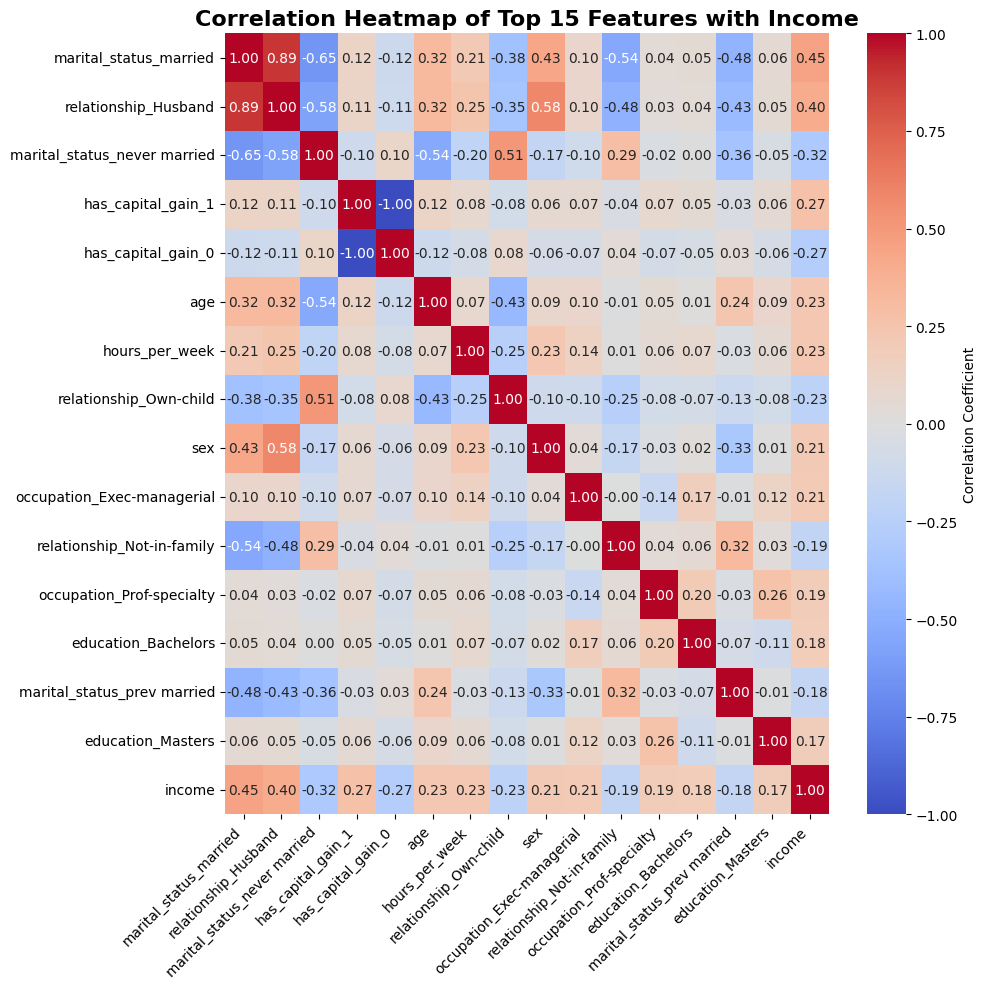

Selected 15 features for heatmap:
- marital_status_married: 0.45
- relationship_Husband: 0.40
- marital_status_never married: -0.32
- has_capital_gain_1: 0.27
- has_capital_gain_0: -0.27
- age: 0.23
- hours_per_week: 0.23
- relationship_Own-child: -0.23
- sex: 0.21
- occupation_Exec-managerial: 0.21
- relationship_Not-in-family: -0.19
- occupation_Prof-specialty: 0.19
- education_Bachelors: 0.18
- marital_status_prev married: -0.18
- education_Masters: 0.17


In [65]:
# Combine X_encoded and y into a single DataFrame for correlation calculation
correlation_df = X_encoded.copy()
correlation_df['income'] = y

# Calculate the full correlation matrix
full_correlation_matrix = correlation_df.corr()

# Get absolute correlations with 'income' and sort them
# Exclude 'income' itself from the list of features to rank
income_correlations = full_correlation_matrix['income'].abs().sort_values(ascending=False)
top_features = income_correlations[1:16].index.tolist() # Top 15 features (excluding income itself)

# Add 'income' back to the list of features for the final heatmap
selected_features = top_features + ['income']

# Create a sub-matrix with only the selected features
selected_correlation_matrix = full_correlation_matrix.loc[selected_features, selected_features]

# Create the heatmap
plt.figure(figsize=(10, 10))
sns.heatmap(selected_correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm',
            center=0, cbar_kws={'label': 'Correlation Coefficient'})
plt.title('Correlation Heatmap of Top 15 Features with Income', fontsize=16, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

print(f"Selected {len(top_features)} features for heatmap:")
for feature in top_features:
    print(f"- {feature}: {full_correlation_matrix.loc[feature, 'income']:.2f}")

In [66]:
import joblib

# Save the selected correlation matrix and feature list for Streamlit
joblib.dump(selected_correlation_matrix, 'selected_correlation_matrix.joblib', compress=3)
joblib.dump(selected_features, 'selected_features.joblib', compress=3)

print("Selected correlation matrix and feature list saved for Streamlit deployment.")

Selected correlation matrix and feature list saved for Streamlit deployment.


In [67]:
%%writefile app.py

import streamlit as st
import joblib
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import plotly.express as px
import plotly.graph_objects as go

# ============================================================================
# CONFIGURATION AND MODEL LOADING
# ============================================================================

st.set_page_config(layout="wide", page_title="Income Prediction Dashboard")

# Load the trained model and scaler
try:
    # XGBoost model with hyperparameter tuning is the final chosen model
    model = joblib.load('xgb_tune_model.joblib')
    scaler = joblib.load('scaler.joblib')
    # Load the pre-calculated selected correlation matrix and features for heatmap
    selected_correlation_matrix = joblib.load('selected_correlation_matrix.joblib')
    selected_features = joblib.load('selected_features.joblib')
except FileNotFoundError:
    st.error("Model, scaler, correlation matrix, or feature list file not found. Please ensure 'xgb_tune_model.joblib', 'scaler.joblib', 'selected_correlation_matrix.joblib', and 'selected_features.joblib' are in the same directory.")
    st.stop()

# Feature list - MUST EXACTLY MATCH the order of X.columns from the training notebook
# These are the 47 selected features after correlation-based feature selection
model_columns = [
    'age', 'hours_per_week', 'sex',
    'workclass_Federal-gov', 'workclass_Local-gov', 'workclass_Private', 'workclass_Self-emp-inc', 'workclass_Unknown',
    'education_10th', 'education_11th', 'education_12th', 'education_1st-4th',
    'education_5th-6th', 'education_7th-8th', 'education_9th', 'education_Bachelors',
    'education_Doctorate', 'education_HS-grad', 'education_Masters',
    'education_Prof-school', 'education_Some-college',
    'marital_status_married', 'marital_status_never married', 'marital_status_prev married',
    'occupation_Adm-clerical', 'occupation_Exec-managerial', 'occupation_Farming-fishing',
    'occupation_Handlers-cleaners', 'occupation_Machine-op-inspct',
    'occupation_Other-service', 'occupation_Priv-house-serv', 'occupation_Prof-specialty',
    'occupation_Unknown',
    'relationship_Husband', 'relationship_Not-in-family',
    'relationship_Other-relative', 'relationship_Own-child', 'relationship_Unmarried',
    'relationship_Wife',
    'race_Black', 'race_White',
    'native_country_Other', 'native_country_United-States',
    'has_capital_gain_0', 'has_capital_gain_1', 'has_capital_loss_0', 'has_capital_loss_1'
]

# Numerical columns that were scaled during training
numerical_cols_for_scaling = ['age', 'hours_per_week']

# ============================================================================
# FEATURE IMPORTANCE DISPLAY (TOP FEATURES HEATMAP)
# ============================================================================

st.subheader("📊 Correlation Heatmap of Top 15 Features with Income")
st.markdown("""
Based on their **correlation with the target income variable**, this heatmap displays the relationships between the 15 most influential features and income. Positive values indicate a direct relationship, negative values an inverse relationship.
""")

if 'selected_correlation_matrix' in locals() and 'selected_features' in locals():
    # Create a Plotly Heatmap
    fig_heatmap = go.Figure(data=go.Heatmap(
        z=selected_correlation_matrix.values,
        x=selected_correlation_matrix.columns,
        y=selected_correlation_matrix.index,
        colorscale='RdBu',
        zmin=-1, zmax=1, # Ensure color scale covers full correlation range
        colorbar=dict(title='Correlation Coefficient')
    ))

    fig_heatmap.update_layout(
        title_text='Correlation Heatmap of Top 15 Features with Income',
        xaxis_nticks=36,
        yaxis_nticks=36,
        height=700, # Adjust height for better visibility
        width=800,  # Adjust width for better visibility
        xaxis_showgrid=False,
        yaxis_showgrid=False,
        xaxis_automargin=True,
        yaxis_automargin=True,
        margin=dict(l=100, r=100, t=100, b=100)
    )

    # Add annotations for correlation values
    annotations = []
    for i, row in enumerate(selected_correlation_matrix.values):
        for j, value in enumerate(row):
            annotations.append(dict(x=selected_correlation_matrix.columns[j], y=selected_correlation_matrix.index[i],
                                    text=f'{value:.2f}',
                                    font=dict(color='white' if abs(value) > 0.6 else 'black' if abs(value) > 0.2 else 'gray'),
                                    showarrow=False))
    fig_heatmap.update_layout(annotations=annotations)

    st.plotly_chart(fig_heatmap, use_container_width=True)

else:
    st.warning("Unable to display feature correlation heatmap.")

st.markdown('---')

# ============================================================================
# DATA PREPROCESSING PIPELINE INFORMATION
# ============================================================================

with st.expander("ℹ️ Data Preprocessing Pipeline"):
    st.markdown("""
    #### Data Preprocessing Steps Applied:

    1. **Data Cleaning**
       - Removed rows with missing values ('?' values)
       - Handled categorical encoding
       - Removed duplicate columns

    2. **Feature Engineering**
       - Created binary features: `has_capital_gain` and `has_capital_loss`
       - Applied One-Hot Encoding for categorical variables
       - Applied Label Encoding for binary features

    3. **Feature Selection**
       - Calculated correlation with target variable
       - Removed features with correlation < 0.03
       - Selected 47 out of 64 total encoded features

    4. **Feature Scaling**
       - Applied StandardScaler to numerical features:
         - `age`
         - `hours_per_week`

    5. **Class Imbalance Handling**
       - Applied SMOTE (Synthetic Minority Over-sampling Technique)
       - Balanced class distribution from 76:24 to 50:50

    6. **Model Training & Selection**
       - Trained multiple models: Logistic Regression, Decision Tree, Random Forest, Gradient Boosting, KNN, SVC
       - Applied Hyperparameter Tuning using RandomizedSearchCV
       - Selected **XGBoost with tuned parameters** as the final model
    """)

st.markdown('---')

# ============================================================================
# USER INPUT FORM
# ============================================================================

st.header("👤 Individual Characteristics")
st.markdown("Adjust the values and select the options below to describe the individual:")

def user_input_features():
    """Create user input form with widgets for all features"""
    user_inputs = {}

    # Widget definitions mapping original feature names to widget creators
    widget_definitions = {
        'age': lambda: st.slider('Age', 17, 90, 35, help="Person's age in years"),
        'workclass': lambda: st.selectbox('Workclass',
            ['Private', 'Self-emp-not-inc', 'Local-gov', 'Unknown', 'State-gov',
             'Self-emp-inc', 'Federal-gov', 'Without-pay', 'Never-worked'],
            help="Type of employment"),
        'education': lambda: st.selectbox('Education Level',
            ['HS-grad', 'Some-college', 'Bachelors', 'Masters', 'Assoc-voc',
             '11th', 'Assoc-acdm', '10th', '7th-8th', '9th', 'Prof-school',
             '12th', 'Doctorate', '5th-6th', '1st-4th', 'Preschool'],
            help="Highest level of education completed"),
        'marital_status': lambda: st.selectbox('Marital Status',
            ['married', 'never married', 'prev married'], # Updated options
            help="Current marital status"),
        'occupation': lambda: st.selectbox('Occupation',
            ['Prof-specialty', 'Craft-repair', 'Exec-managerial', 'Adm-clerical',
             'Sales', 'Other-service', 'Machine-op-inspct', 'Unknown',
             'Transport-moving', 'Handlers-cleaners', 'Farming-fishing',
             'Tech-support', 'Protective-serv', 'Priv-house-serv', 'Armed-Forces', 'No-occupation'],
            help="Type of occupation"),
        'relationship': lambda: st.selectbox('Relationship',
            ['Husband', 'Not-in-family', 'Own-child', 'Unmarried', 'Wife', 'Other-relative'],
            help="Relationship to household head"),
        'race': lambda: st.selectbox('Race',
            ['White', 'Black', 'Asian-Pac-Islander', 'Amer-Indian-Eskimo', 'Other'],
            help="Race/ethnicity"),
        'sex': lambda: st.selectbox('Gender',
            ['Male', 'Female'],
            help="Gender"),
        'capital_gain': lambda: st.selectbox('Has Capital Gain?',
            ['No', 'Yes'],
            help="Whether the person has capital gains"),
        'capital_loss': lambda: st.selectbox('Has Capital Loss?',
            ['No', 'Yes'],
            help="Whether the person has capital losses"),
        'hours_per_week': lambda: st.slider('Hours per Week', 1, 99, 40, help="Number of hours worked per week"),
        'native_country': lambda: st.selectbox('Native Country',
            ['United-States', 'Other'],
            help="Country of origin")
    }

    # Organize inputs in columns
    num_cols_per_row = 3
    cols = st.columns(num_cols_per_row)
    col_index = 0

    # Use importance-based ordering if available, otherwise default order
    feature_order = [
        'age', 'hours_per_week', 'education', 'marital_status', 'occupation',
        'relationship', 'workclass', 'race', 'sex', 'capital_gain',
        'capital_loss', 'native_country'
    ]

    for feature_name in feature_order:
        if feature_name in widget_definitions:
            with cols[col_index]:
                user_inputs[feature_name] = widget_definitions[feature_name]()
            col_index = (col_index + 1) % num_cols_per_row
            if col_index == 0:
                cols = st.columns(num_cols_per_row)

    return pd.DataFrame(user_inputs, index=[0])

input_df_raw = user_input_features()

# ============================================================================
# INPUT PREPROCESSING
# ============================================================================

def preprocess_input_for_model(df_raw):
    """Preprocess user input to match the model's training format"""

    temp_df = df_raw.copy()

    # Convert numerical columns to float
    temp_df['age'] = temp_df['age'].astype(float)
    temp_df['hours_per_week'] = temp_df['hours_per_week'].astype(float)

    # Handle 'sex' (Label Encoding in notebook: Male=1, Female=0)
    temp_df['sex'] = 1 if temp_df['sex'].iloc[0] == 'Male' else 0

    # Create binary capital features as string '1'/'0' for OHE (as done in notebook)
    temp_df['has_capital_gain'] = '1' if temp_df['capital_gain'].iloc[0] == 'Yes' else '0'
    temp_df['has_capital_loss'] = '1' if temp_df['capital_loss'].iloc[0] == 'Yes' else '0'

    # Remove original capital_gain and capital_loss columns as they are replaced by has_capital_gain/loss
    temp_df = temp_df.drop(columns=['capital_gain', 'capital_loss'])

    # Define columns to be one-hot encoded (excluding 'sex' which is already handled)
    # The 'has_capital_gain' and 'has_capital_loss' are treated as categorical for OHE, as their values are '0' or '1' strings.
    ohe_input_cols = [
        'workclass', 'education', 'marital_status', 'occupation',
        'relationship', 'race', 'native_country',
        'has_capital_gain', 'has_capital_loss' # These will be one-hot encoded to _0 and _1 variants
    ]

    # Apply one-hot encoding without dropping the first category
    processed_df = pd.get_dummies(temp_df, columns=ohe_input_cols, drop_first=False)

    # Convert boolean columns to integers (pd.get_dummies might return bool)
    for col in processed_df.columns:
        if processed_df[col].dtype == 'bool':
            processed_df[col] = processed_df[col].astype(int)

    # Reindex to match model columns exactly, filling missing with 0
    final_df = processed_df.reindex(columns=model_columns, fill_value=0)

    # Ensure correct data types (esp. for scaled numerical columns)
    for col in model_columns:
        if col in numerical_cols_for_scaling:
            final_df[col] = final_df[col].astype(float)
        else: # All other columns are expected to be int (binary or label encoded)
            final_df[col] = final_df[col].astype(int)


    # Apply scaling to numerical columns
    final_df[numerical_cols_for_scaling] = scaler.transform(final_df[numerical_cols_for_scaling])

    return final_df

# ============================================================================
# PREDICTION BUTTON AND RESULTS
# ============================================================================

st.markdown('---')

# Centered prediction button with custom styling
st.markdown("""
<style>
div.stButton > button {
    background-color: #4CAF50;
    color: white;
    padding: 15px 32px;
    font-size: 18px;
    font-weight: bold;
    border: none;
    border-radius: 8px;
    cursor: pointer;
    width: 100%;
    transition: background-color 0.3s ease;
}
div.stButton > button:hover {
    background-color: #45a049;
}
</style>
""", unsafe_allow_html=True)

col_left, col_center, col_right = st.columns([1, 2, 1])
with col_center:
    predict_clicked = st.button(
        '🚀 Predict Income',
        help="Click to get the income prediction based on the entered characteristics"
    )

if predict_clicked:
    # Preprocess and make prediction
    processed_input = preprocess_input_for_model(input_df_raw)
    prediction = model.predict(processed_input)
    prediction_proba = model.predict_proba(processed_input)

    # Display results
    st.subheader('🎯 Prediction Results')
    st.markdown('---')

    result_col1, result_col2 = st.columns(2)

    with result_col1:
        st.write("### Predicted Income Level:")
        if prediction[0] == 1:
            st.success("### ✅ Income **>50K** (High Income)", icon="🎉")
        else:
            st.info("### ℹ️ Income **≤50K** (Low Income)", icon="📉")

    with result_col2:
        st.write("### Prediction Confidence:")
        confidence_low = prediction_proba[0][0]
        confidence_high = prediction_proba[0][1]

        col_metric1, col_metric2 = st.columns(2)
        with col_metric1:
            st.metric(
                label="≤50K Probability",
                value=f"{confidence_low:.1%}",
                delta=None
            )
        with col_metric2:
            st.metric(
                label=">50K Probability",
                value=f"{confidence_high:.1%}",
                delta=None
            )

    # Confidence gauge chart
    st.markdown('---')
    st.write("### Confidence Gauge:")

    fig_gauge = go.Figure(data=[go.Indicator(
        mode="gauge+number+delta",
        value=confidence_high * 100,
        domain={'x': [0, 1], 'y': [0, 1]},
        title={'text': "Confidence for >50K Income (%)"},
        delta={'reference': 50},
        gauge={
            'axis': {'range': [0, 100]},
            'bar': {'color': "darkblue"},
            'steps': [
                {'range': [0, 25], 'color': "lightgray"},
                {'range': [25, 50], 'color': "gray"},
                {'range': [50, 75], 'color': "lightgreen"},
                {'range': [75, 100], 'color': "green"}
            ],
            'threshold': {
                'line': {'color': "red", 'width': 4},
                'thickness': 0.75,
                'value': 90
            }
        }
    )])
    fig_gauge.update_layout(height=400)
    st.plotly_chart(fig_gauge, use_container_width=True)

    st.markdown('---')
else:
    st.info("👆 Adjust the features above and click '🚀 Predict Income' to see the results!")

# ============================================================================
# FOOTER
# ============================================================================

st.markdown('---')
st.markdown("""
<div style='text-align: center; color: gray; font-size: 12px;'>
    <p>Developed with Streamlit and XGBoost by Dataverse Team DS55</p>
    <p>Data Source: <a href='https://www.kaggle.com/datasets/uciml/adult-census-income'>UCI Machine Learning Repository - Adult Census Income</a></p>
    <p>Model: XGBoost with Hyperparameter Tuning (RandomizedSearchCV)</p>
</div>
""", unsafe_allow_html=True)

Overwriting app.py


In [68]:
# Fitur yang berkorelasi dengan variabel target
print('\n--Correated Features with target variable (Top to Bottom)--\n')
print(abs(X_encoded.corrwith(y)).sort_values(ascending=False)[1:])


--Correated Features with target variable (Top to Bottom)--

relationship_Husband            0.403786
marital_status_never married    0.318773
has_capital_gain_0              0.265917
has_capital_gain_1              0.265917
age                             0.230361
                                  ...   
workclass_Never-worked          0.008026
workclass_Without-pay           0.007002
education_Assoc-voc             0.006882
fnlwgt                          0.006335
occupation_Armed-Forces         0.003864
Length: 64, dtype: float64


In [69]:
# Display features with LOWEST correlation with income (potential noise/irrelevant features)
print('\n' + '='*70)
print('FEATURES WITH LOWEST CORRELATION WITH INCOME (Potential Noise)')
print('='*70)

# Get correlation with income, remove income itself, and sort by absolute value ascending
lowest_corr = abs(correlation_matrix['income']).sort_values(ascending=True)[:-1]  # [:-1] to exclude 'income'

print('\n--Bottom 20 Features (Least Correlated with Income)--\n')
print(lowest_corr.head(20))

print('\n' + '='*70)
print('INTERPRETATION:')
print('='*70)
print('Features with correlation close to 0 have weak predictive power.')
print('These variables may:')
print('  • Add noise to the model')
print('  • Reduce model generalization')
print('  • Increase overfitting risk')
print('  • Be candidates for removal or feature selection')
print('='*70)


FEATURES WITH LOWEST CORRELATION WITH INCOME (Potential Noise)

--Bottom 20 Features (Least Correlated with Income)--

occupation_Armed-Forces        0.003864
fnlwgt                         0.006335
education_Assoc-voc            0.006882
workclass_Without-pay          0.007002
occupation_No-occupation       0.008026
workclass_Never-worked         0.008026
education_Assoc-acdm           0.008059
occupation_Craft-repair        0.011533
race_Asian-Pac-Islander        0.012585
workclass_State-gov            0.013617
occupation_Transport-moving    0.018486
occupation_Tech-support        0.020949
education_Preschool            0.021975
occupation_Sales               0.023973
occupation_Protective-serv     0.024871
race_Other                     0.024921
workclass_Self-emp-not-inc     0.027187
race_Amer-Indian-Eskimo        0.028248
education_1st-4th              0.034574
workclass_Local-gov            0.034574
Name: income, dtype: float64

INTERPRETATION:
Features with correlation close to

In [70]:
# Drop features with correlation < 0.03 to reduce noise
print('\n' + '='*70)
print('FEATURE SELECTION: Removing Low Correlation Features')
print('='*70)

# Get correlation with income (absolute values)
income_correlation = abs(correlation_matrix['income'])

# Identify features with correlation < 0.03 (excluding income itself)
low_correlation_threshold = income_correlation < 0.03
low_correlation_features = income_correlation[low_correlation_threshold].index.tolist()

# Remove 'income' from the list if it exists
if 'income' in low_correlation_features:
    low_correlation_features.remove('income')

print(f'\nFeatures to be REMOVED (correlation < 0.03):')
print(f'Total features to remove: {len(low_correlation_features)}\n')
for i, feature in enumerate(low_correlation_features, 1):
    corr_value = abs(correlation_matrix.loc[feature, 'income'])
    print(f'{i:2d}. {feature:40s} (correlation: {corr_value:.6f})')

# Create final_features by dropping low correlation columns
final_features = X_encoded.drop(columns=low_correlation_features)

print('\n' + '='*70)
print('FEATURE REDUCTION SUMMARY')
print('='*70)
print(f'Original number of features: {X_encoded.shape[1]}')
print(f'Features removed:           {len(low_correlation_features)}')
print(f'Final number of features:   {final_features.shape[1]}')
print(f'Number of samples:          {final_features.shape[0]}')
print(f'\nDataset shapes:')
print(f'  final_features: {final_features.shape}')
print(f'  y (target):     {y.shape}')

print(f'\nRemaining features ({final_features.shape[1]}):')
for i, col in enumerate(final_features.columns.tolist(), 1):
    if i % 4 == 0:
        print(f'{col}')
    else:
        print(f'{col:30s}', end='')

print('\n' + '='*70)
print('Ready for model training with final_features!')
print('='*70)


FEATURE SELECTION: Removing Low Correlation Features

Features to be REMOVED (correlation < 0.03):
Total features to remove: 18

 1. fnlwgt                                   (correlation: 0.006335)
 2. workclass_Never-worked                   (correlation: 0.008026)
 3. workclass_Self-emp-not-inc               (correlation: 0.027187)
 4. workclass_State-gov                      (correlation: 0.013617)
 5. workclass_Without-pay                    (correlation: 0.007002)
 6. education_Assoc-acdm                     (correlation: 0.008059)
 7. education_Assoc-voc                      (correlation: 0.006882)
 8. education_Preschool                      (correlation: 0.021975)
 9. occupation_Armed-Forces                  (correlation: 0.003864)
10. occupation_Craft-repair                  (correlation: 0.011533)
11. occupation_No-occupation                 (correlation: 0.008026)
12. occupation_Protective-serv               (correlation: 0.024871)
13. occupation_Sales                      

# Model Development

### Declaring `dependent (y, target)` and `independent variable (X, features)`

In [71]:
# Prepare X and y for model training
# X is final_features (already filtered features without target)
# y is the target variable (already created previously)

X = final_features.copy()

print("="*70)
print("PREPARE DATA FOR MODEL TRAINING")
print("="*70)
print(f"\nX (Features) shape: {X.shape}")
print(f"y (Target) shape:  {y.shape}")
print(f"\nFirst 5 rows of X:")
print(X.head())
print(f"\nTarget variable distribution:")
print(y.value_counts())
print(f"\nData types in X:")
print(X.dtypes.value_counts())
print(f"\nReady for model training!")
print("="*70)

PREPARE DATA FOR MODEL TRAINING

X (Features) shape: (48841, 47)
y (Target) shape:  (48841,)

First 5 rows of X:
   age  hours_per_week  sex  workclass_Federal-gov  workclass_Local-gov  \
0   39              40    1                    0.0                  0.0   
1   50              13    1                    0.0                  0.0   
2   38              40    1                    0.0                  0.0   
3   53              40    1                    0.0                  0.0   
4   28              40    0                    0.0                  0.0   

   workclass_Private  workclass_Self-emp-inc  workclass_Unknown  \
0                0.0                     0.0                0.0   
1                0.0                     0.0                0.0   
2                1.0                     0.0                0.0   
3                1.0                     0.0                0.0   
4                1.0                     0.0                0.0   

   education_10th  education_11th

## SMOTE: Fixing imbalanced dataset


In [72]:
# Diagnostic check before SMOTE
print("="*70)
print("DIAGNOSTIC CHECK - Y VARIABLE")
print("="*70)
print(f"y dtype: {y.dtype}")
print(f"y unique values: {y.unique()}")
print(f"y value_counts:\n{y.value_counts()}")
print(f"y contains NaN: {y.isna().sum()}")
print(f"y min/max: {y.min()} / {y.max()}")
print("="*70)

# Ensure y is numeric and integer type
y = y.astype(int).reset_index(drop=True)
print(f"\ny after conversion to int:")
print(f"y dtype: {y.dtype}")
print(f"y unique values: {y.unique()}")


DIAGNOSTIC CHECK - Y VARIABLE
y dtype: int64
y unique values: [0 1]
y value_counts:
income
0    37154
1    11687
Name: count, dtype: int64
y contains NaN: 0
y min/max: 0 / 1

y after conversion to int:
y dtype: int64
y unique values: [0 1]


In [73]:
# Fixing imbalanced dataset
from imblearn.over_sampling import SMOTE

# Ensure y is numeric (int type) before SMOTE
y_numeric = y.astype(int).reset_index(drop=True)

# Reset X_scaled index to match y_numeric
X_scaled_reset = X_scaled.reset_index(drop=True)

smote_sampler = SMOTE(random_state=0)
X_sampled, y_sampled = smote_sampler.fit_resample(X_scaled_reset, y_numeric)

# Convert y_sampled to integer type (SMOTE may convert it to string/object)
y_sampled = y_sampled.astype(int)

print("="*70)
print("SMOTE: HANDLING IMBALANCED DATASET")
print("="*70)
print(f"\nShape of X_sampled after re-sampling: {X_sampled.shape}")
print(f"Shape of y_sampled after re-sampling: {y_sampled.shape}")
print(f"Data type of y_sampled: {y_sampled.dtype}")

# Sanity Check
print('\nClass distribution BEFORE SMOTE:')
print(y_numeric.value_counts())
print('\nClass distribution AFTER SMOTE:')
print(y_sampled.value_counts())
print(f"\nBalance ratio - Class 0: {(y_sampled==0).sum()}, Class 1: {(y_sampled==1).sum()}")
print("="*70)


SMOTE: HANDLING IMBALANCED DATASET

Shape of X_sampled after re-sampling: (74308, 47)
Shape of y_sampled after re-sampling: (74308,)
Data type of y_sampled: int64

Class distribution BEFORE SMOTE:
income
0    37154
1    11687
Name: count, dtype: int64

Class distribution AFTER SMOTE:
income
0    37154
1    37154
Name: count, dtype: int64

Balance ratio - Class 0: 37154, Class 1: 37154


## Spiliting into Train and Test Data

In [74]:
# Split data into train and test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X_sampled, y_sampled, test_size=0.2, random_state=0)

# Ensure labels are integers to avoid type mismatch with f1_score
y_train = y_train.astype(int)
y_test = y_test.astype(int)

print("="*70)
print("TRAIN-TEST SPLIT SUMMARY")
print("="*70)
print(f"\nTraining set size: {x_train.shape[0]} samples, {x_train.shape[1]} features")
print(f"Test set size: {x_test.shape[0]} samples, {x_test.shape[1]} features")
print(f"\nTraining set class distribution:")
print(y_train.value_counts())
print(f"\nTest set class distribution:")
print(y_test.value_counts())
print(f"\nData types - y_train: {y_train.dtype}, y_test: {y_test.dtype}")
print("="*70)

TRAIN-TEST SPLIT SUMMARY

Training set size: 59446 samples, 47 features
Test set size: 14862 samples, 47 features

Training set class distribution:
income
1    29757
0    29689
Name: count, dtype: int64

Test set class distribution:
income
0    7465
1    7397
Name: count, dtype: int64

Data types - y_train: int64, y_test: int64


# Machine Learning Algorithm Result and Selection

## Logistic Regression Model

In [75]:
# Model Building
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=0)

# Training Model
lr.fit(x_train,y_train)

# Model Summary
y_pred_lr = lr.predict(x_test)
y_pred_train_lr = lr.predict(x_train)

In [76]:
print("-----Test Data Accuracy----")
print('Logistic Regression:')
print('Accuracy score:', round(accuracy_score(y_test, y_pred_lr.astype(int)), 2))
print('F1 score:', round(f1_score(y_test, y_pred_lr.astype(int)), 2))

print("\n-----Train Data Accuracy----")
print('Accuracy score:', round(accuracy_score(y_train, y_pred_train_lr.astype(int)), 2))
print('F1 score:', round(f1_score(y_train, y_pred_train_lr.astype(int)), 2))

-----Test Data Accuracy----
Logistic Regression:
Accuracy score: 0.82
F1 score: 0.82

-----Train Data Accuracy----
Accuracy score: 0.82
F1 score: 0.82


## Decision Tree Classifier

In [77]:
# Model Building
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth=10,random_state=0)

# Training Model
dt.fit(x_train,y_train)

# Model Summary
y_pred_dt = dt.predict(x_test)
y_pred_train_dt = dt.predict(x_train)

In [78]:
print("-----Test Data Accuracy----")
print('Decision Tree Classifier:')
print('Accuracy score:', round(accuracy_score(y_test, y_pred_dt), 2))
print('F1 score:', round(f1_score(y_test, y_pred_dt), 2))

print("\n-----Train Data Accuracy----")
print('Accuracy score:', round(accuracy_score(y_train, y_pred_train_dt), 2))
print('F1 score:', round(f1_score(y_train, y_pred_train_dt), 2))

-----Test Data Accuracy----
Decision Tree Classifier:
Accuracy score: 0.84
F1 score: 0.85

-----Train Data Accuracy----
Accuracy score: 0.85
F1 score: 0.86


## Random Forest Classifier

In [79]:
# Model Building
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=0, max_depth=30)

# Training Model
rfc.fit(x_train,y_train)

# Model summary
y_pred_rfc = rfc.predict(x_test)
y_pred_train_rfc = rfc.predict(x_train)

In [80]:
print("-----Test Data Accuracy----")
print('Random Forest Classifier:')
print('Accuracy score:', round(accuracy_score(y_test, y_pred_dt), 2))
print('F1 score:', round(f1_score(y_test, y_pred_rfc), 2))

print("\n-----Train Data Accuracy----")
print('Accuracy score:', round(accuracy_score(y_train, y_pred_train_rfc), 2))
print('F1 score:', round(f1_score(y_train, y_pred_train_rfc), 2))

-----Test Data Accuracy----
Random Forest Classifier:
Accuracy score: 0.84
F1 score: 0.88

-----Train Data Accuracy----
Accuracy score: 0.95
F1 score: 0.95


## GradientBoosting Classifier

In [81]:
# Model Building
from sklearn.ensemble import GradientBoostingClassifier
gbtc = GradientBoostingClassifier(random_state=0)

# Training Model
gbtc.fit(x_train,y_train)

# Model summary
y_pred_gbtc = gbtc.predict(x_test)
y_pred_train_gbtc = gbtc.predict(x_train)

In [82]:
print("-----Test Data Accuracy----")
print('GradientBoostingClassifier:')
print('Accuracy score:', round(accuracy_score(y_test, y_pred_gbtc), 2))
print('F1 score:', round(f1_score(y_test, y_pred_gbtc), 2))

print("\n-----Train Data Accuracy----")
print('Accuracy score:', round(accuracy_score(y_train, y_pred_train_gbtc), 2))
print('F1 score:', round(f1_score(y_train, y_pred_train_gbtc), 2))

-----Test Data Accuracy----
GradientBoostingClassifier:
Accuracy score: 0.85
F1 score: 0.85

-----Train Data Accuracy----
Accuracy score: 0.85
F1 score: 0.85


## XGBoost Classifier

In [83]:
# Model Building
from xgboost import XGBClassifier
xgb = XGBClassifier(random_state=0)

# Training Model
xgb.fit(x_train, y_train)

# Mode summary
y_pred_xgb = xgb.predict(x_test)
y_pred_train_xgb = xgb.predict(x_train)

In [84]:
print("-----Test Data Accuracy----")
print('XGB Classifier:')
print('Accuracy score:',round(accuracy_score(y_test, y_pred_xgb), 2))
print('F1 score:',round(f1_score(y_test, y_pred_xgb), 2))

print("\n-----Train Data Accuracy----")
print('Accuracy score:',round(accuracy_score(y_train, y_pred_train_xgb),2))
print('F1 score:',round(f1_score(y_train, y_pred_train_xgb), 2))

-----Test Data Accuracy----
XGB Classifier:
Accuracy score: 0.87
F1 score: 0.88

-----Train Data Accuracy----
Accuracy score: 0.89
F1 score: 0.89


## Support Vector Classifier (SVC)

In [85]:
# Model Building
from sklearn.svm import SVC
svc = SVC(random_state=0)

# Training Model
svc.fit(x_train, y_train)

# Model summary
y_pred_svc = svc.predict(x_test)
y_pred_train_svc = svc.predict(x_train)

In [86]:
print("-----Test Data Accuracy----")
print('Support Vector Classifier (SVC):')
print('Accuracy score:', round(accuracy_score(y_test, y_pred_svc), 2))
print('F1 score:', round(f1_score(y_test, y_pred_svc), 2))

print("\n-----Train Data Accuracy----")
print('Accuracy score:', round(accuracy_score(y_train, y_pred_train_svc), 2))
print('F1 score:', round(f1_score(y_train, y_pred_train_svc), 2))


-----Test Data Accuracy----
Support Vector Classifier (SVC):
Accuracy score: 0.84
F1 score: 0.84

-----Train Data Accuracy----
Accuracy score: 0.84
F1 score: 0.85


## K-Nearest Neighbors (KNN)

In [87]:
# Model Building
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

# Training Model
knn.fit(x_train, y_train)

# Model summary
y_pred_knn = knn.predict(x_test)
y_pred_train_knn = knn.predict(x_train)

In [88]:
print("-----Test Data Accuracy----")
print('KNN Classifier:')
print('Accuracy score:',round(accuracy_score(y_test, y_pred_knn), 2))
print('F1 score:',round(f1_score(y_test, y_pred_knn), 2))

print("\n-----Train Data Accuracy----")
print('Accuracy score:',round(accuracy_score(y_train, y_pred_train_knn),2))
print('F1 score:',round(f1_score(y_train, y_pred_train_knn), 2))

-----Test Data Accuracy----
KNN Classifier:
Accuracy score: 0.84
F1 score: 0.85

-----Train Data Accuracy----
Accuracy score: 0.89
F1 score: 0.89


# -> Evaluating Model Selection

In [89]:
models = []

models.append(('Logistic Regression', LogisticRegression(solver='liblinear', random_state = 0,
                                                         class_weight='balanced')))

models.append(('Decision Tree Classifier',
               DecisionTreeClassifier(criterion = 'entropy', random_state = 0)))

models.append(('Random Forest', RandomForestClassifier(
    n_estimators=100, criterion = 'entropy', random_state = 0)))

models.append(('XGBoost Classifier', XGBClassifier(random_state=0)))

models.append(('GradientBoosting Classifier', GradientBoostingClassifier(
    n_estimators=100, learning_rate=0.1, max_depth=3, random_state=0)))

models.append(('SVC Classifier', SVC(random_state=0)))

models.append(('KNN Classifier', KNeighborsClassifier()))

In [90]:
#Evaluating Model Results:
from sklearn.model_selection import train_test_split
from sklearn import model_selection
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

acc_results = []
auc_results = []
names = []
# set table to table to populate with performance results
col = ['Algorithm', 'ROC AUC Mean', 'ROC AUC STD',
       'Accuracy Mean', 'Accuracy STD']

model_results = pd.DataFrame(columns=col)
i = 0

# evaluate each model using k-fold cross-validation
for name, model in models:
    kfold = model_selection.KFold(n_splits=5)  # 5-fold cross-validation

    cv_acc_results = model_selection.cross_val_score(  # accuracy scoring
        model, x_train, y_train, cv=kfold, scoring='accuracy')

    cv_auc_results = model_selection.cross_val_score(  # roc_auc scoring
        model, x_train, y_train, cv=kfold, scoring='roc_auc')

    acc_results.append(cv_acc_results)
    auc_results.append(cv_auc_results)
    names.append(name)
    model_results.loc[i] = [name,
                         round(cv_auc_results.mean()*100, 2),
                         round(cv_auc_results.std()*100, 2),
                         round(cv_acc_results.mean()*100, 2),
                         round(cv_acc_results.std()*100, 2)
                         ]
    i += 1

model_results.sort_values(by=['ROC AUC Mean'], ascending=False)

,Algorithm,ROC AUC Mean,ROC AUC STD,Accuracy Mean,Accuracy STD
3,XGBoost Classifier,95.34,0.12,87.49,0.20
2,Random Forest,93.69,0.13,86.52,0.16
4,GradientBoosting Classifier,92.63,0.07,84.49,0.17
5,SVC Classifier,91.29,0.15,83.45,0.16
6,KNN Classifier,90.64,0.20,83.93,0.20
0,Logistic Regression,90.04,0.18,81.60,0.20
1,Decision Tree Classifier,85.32,0.24,83.78,0.23


# Hyperparameter Optimization: Tuning XGB and RF with RandomizedSearchCV

## XGB Tune

In [91]:
# XGB Classifier Hyperparameter optimization using RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV
params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
}

classifier=XGBClassifier()
random_search = RandomizedSearchCV(classifier,
                                 param_distributions=params,
                                 n_iter=5, n_jobs=-1,cv=5,verbose=3)

In [92]:
random_search.fit(x_train,y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           feature_weights=None, gamma=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constrain...
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None, ...),
                   n_iter=5, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.3, 0.4, 0.5,
                                                             0.7],
                                        'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
                                        'learning_rate': [0.05, 0.1, 0.15, 0.2,
                                                          0.25, 0.3],
                                        'max_depth': [3, 4, 5, 6, 8, 10, 12,
                                                      15],
                                        'min_child_weight': [1, 3, 5, 7]},
                   verbose=3)

In [93]:
random_search.best_params_

{'min_child_weight': 7,
 'max_depth': 8,
 'learning_rate': 0.25,
 'gamma': 0.2,
 'colsample_bytree': 0.7}

In [94]:
# Again Training our model with best parameter
xgb_tune = XGBClassifier(random_state=0,min_child_weight=3,max_depth= 15,
                    learning_rate = 0.1,gamma= 0.1,
                    colsample_bytree= 0.7)
xgb_tune.fit(x_train,y_train)
y_pred_xgb_tune = xgb_tune.predict(x_test)

### Analysing Results: XGB Tune

In [95]:
print("-----Test Data Accuracy----")
print('Gradient Boosting Classifier:')
print('Accuracy score:', round(accuracy_score(y_test, y_pred_xgb_tune), 2))
print('F1 score:', round(f1_score(y_test, y_pred_xgb_tune), 2))

-----Test Data Accuracy----
Gradient Boosting Classifier:
Accuracy score: 0.88
F1 score: 0.88


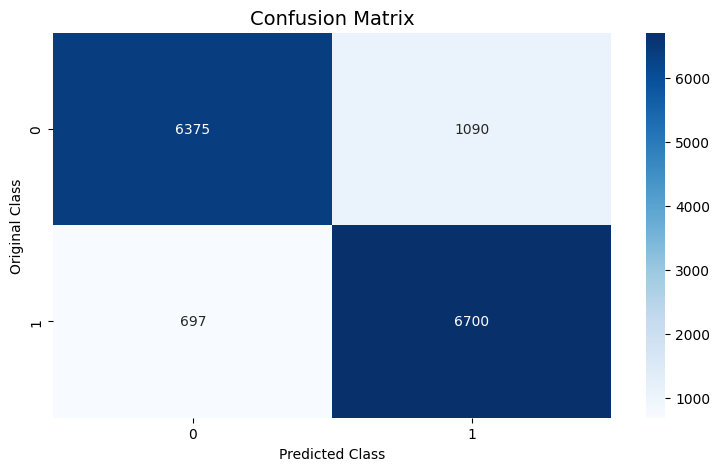

In [96]:
# Plot confusion matrix
plt.figure(figsize=[9,5])
sns.heatmap(confusion_matrix(y_test, y_pred_xgb_tune), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix', fontsize = 14)
plt.xlabel('Predicted Class')
plt.ylabel('Original Class')
plt.show()

In [97]:
# Classificaton Report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_xgb_tune))

              precision    recall  f1-score   support

           0       0.90      0.85      0.88      7465
           1       0.86      0.91      0.88      7397

    accuracy                           0.88     14862
   macro avg       0.88      0.88      0.88     14862
weighted avg       0.88      0.88      0.88     14862



### ROC Curve XGB Tune

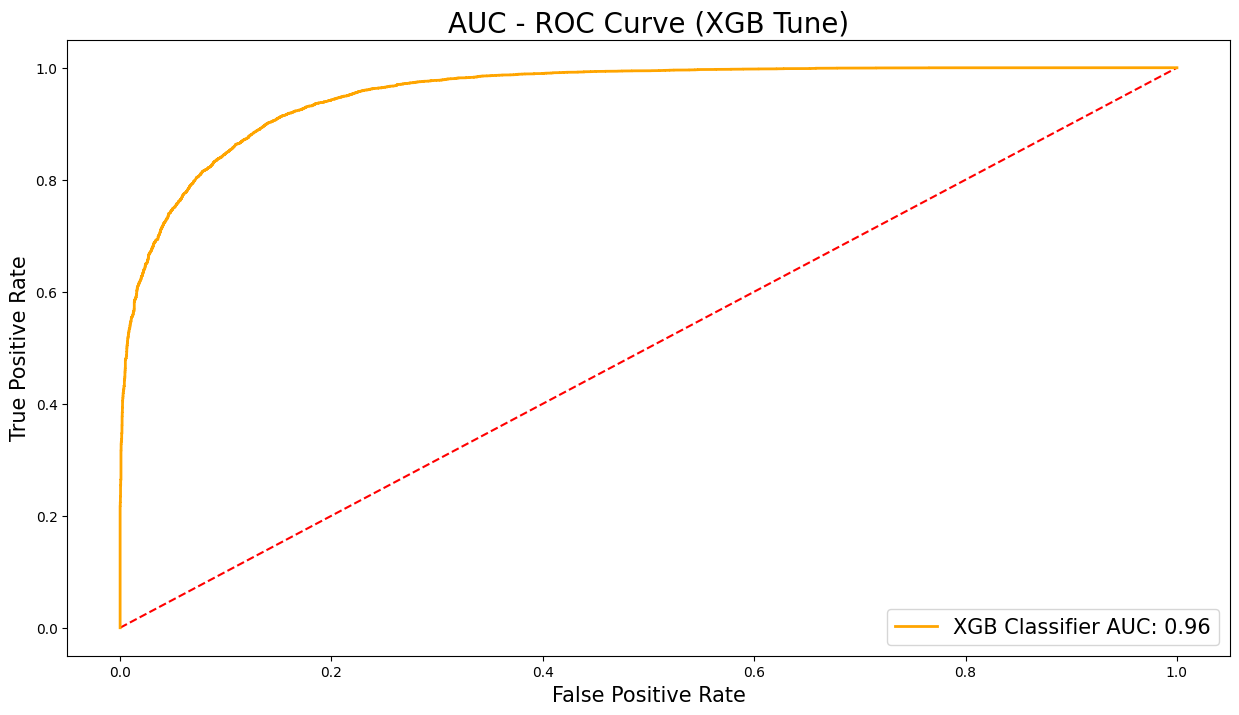

In [98]:
# Plot Receiver Operating Characteristic (ROC)
from sklearn.metrics import roc_curve, auc
plt.figure(figsize = (15, 8))
plt.plot([0,1], [0,1], 'r--')

probs = xgb_tune.predict_proba(x_test)

# Reading probability of second class
probs = probs[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, probs)
roc_auc = auc(fpr, tpr)

label = 'XGB Classifier' + ' AUC:' + ' {0:.2f}'.format(roc_auc)
plt.plot(fpr, tpr, c = 'orange', label = label, linewidth = 2)

plt.xlabel('False Positive Rate', fontsize = 15)
plt.ylabel('True Positive Rate', fontsize = 15)
plt.title('AUC - ROC Curve (XGB Tune)', fontsize = 20)
plt.legend(loc = 'lower right',fontsize = 15)
plt.show()

## Random Forest Tune

In [99]:
params={
 "n_estimators"     : [100, 200, 300],
 "max_depth"        : [5, 10, 15, 20, 30, None],
 "min_samples_split": [2, 5, 10],
 "min_samples_leaf" : [1, 2, 4],
 "max_features"     : ['sqrt', 'log2', 0.6, 0.8, 1.0],
 "criterion"        : ['gini', 'entropy']
}

classifier=RandomForestClassifier(
    n_estimators=100, criterion = 'entropy', random_state = 0)
random_search = RandomizedSearchCV(classifier,
                                 param_distributions=params,
                                 n_iter=5, n_jobs=-1,cv=5,verbose=3)

In [100]:
random_search.fit(x_train,y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


RandomizedSearchCV(cv=5,
                   estimator=RandomForestClassifier(criterion='entropy',
                                                    random_state=0),
                   n_iter=5, n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [5, 10, 15, 20, 30, None],
                                        'max_features': ['sqrt', 'log2', 0.6,
                                                         0.8, 1.0],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300]},
                   verbose=3)

In [101]:
# Again Training our model with best parameter
rfc_tune = RandomForestClassifier(random_state=0, **random_search.best_params_)
rfc_tune.fit(x_train,y_train)
y_pred_rfc_tune = rfc_tune.predict(x_test)

### Analysing Results: RFC Tune

In [102]:
print("-----Test Data Accuracy----")
print('RFC Tune:')
print('Accuracy score:', round(accuracy_score(y_test, y_pred_rfc_tune), 2))
print('F1 score:', round(f1_score(y_test, y_pred_rfc_tune), 2))

-----Test Data Accuracy----
RFC Tune:
Accuracy score: 0.88
F1 score: 0.88


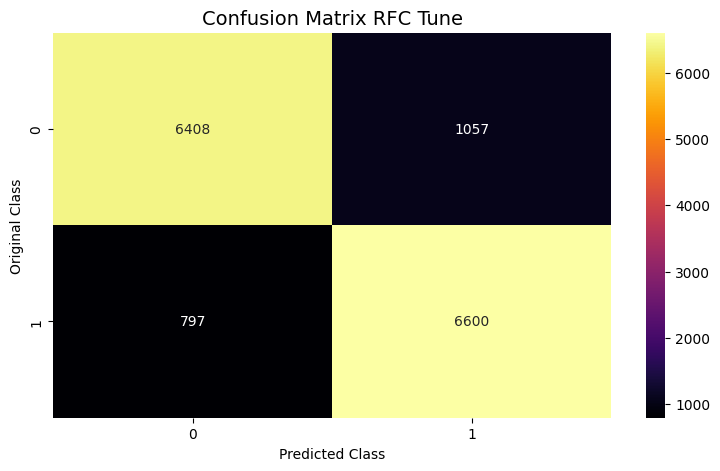

In [103]:
# Plot confusion matrix for rfc_tune
plt.figure(figsize=[9,5])
sns.heatmap(confusion_matrix(y_test, y_pred_rfc_tune), annot=True, fmt='d', cmap='inferno')
plt.title('Confusion Matrix RFC Tune', fontsize = 14)
plt.xlabel('Predicted Class')
plt.ylabel('Original Class')
plt.show()

### ROC Curve RFC Tune

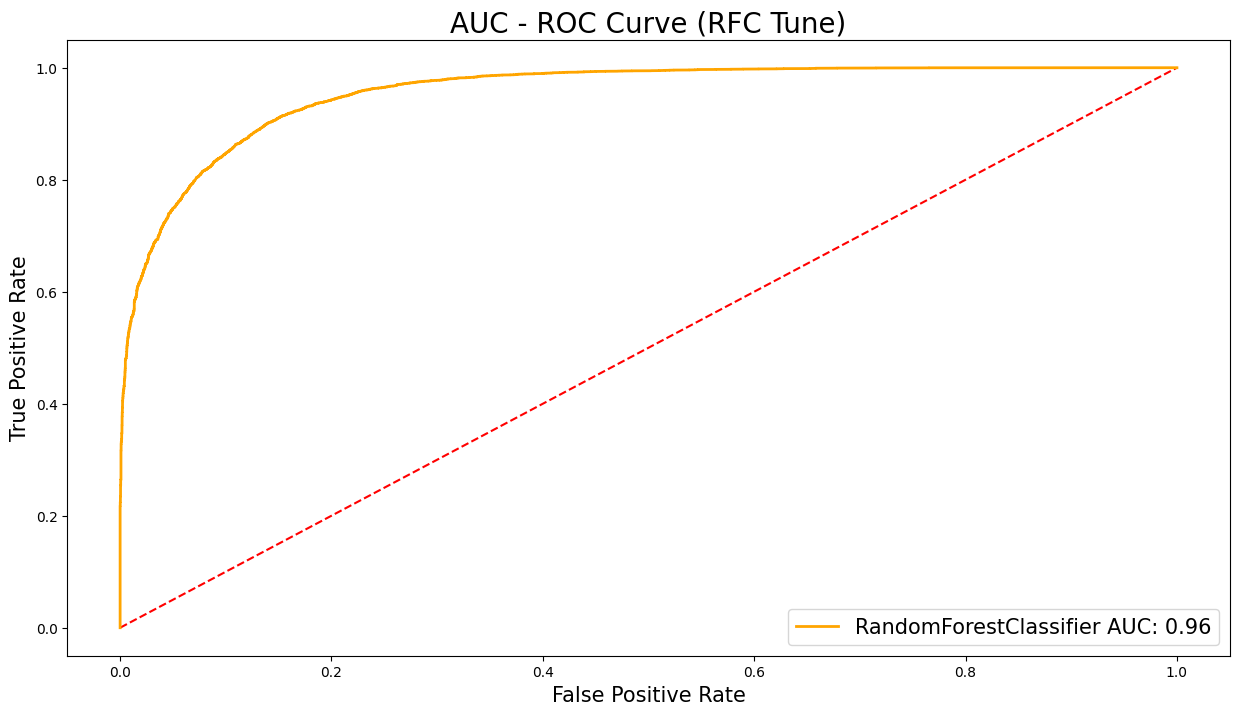

In [104]:
# Plot Receiver Operating Characteristic (ROC)
from sklearn.metrics import roc_curve, auc
plt.figure(figsize = (15, 8))
plt.plot([0,1], [0,1], 'r--')

probs = xgb_tune.predict_proba(x_test)

# Reading probability of second class
probs = probs[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, probs)
roc_auc = auc(fpr, tpr)

label = 'RandomForestClassifier' + ' AUC:' + ' {0:.2f}'.format(roc_auc)
plt.plot(fpr, tpr, c = 'orange', label = label, linewidth = 2)

plt.xlabel('False Positive Rate', fontsize = 15)
plt.ylabel('True Positive Rate', fontsize = 15)
plt.title('AUC - ROC Curve (RFC Tune)', fontsize = 20)
plt.legend(loc = 'lower right',fontsize = 15)
plt.show()

# -> Evaluating Tuned Models with Cross-Validation

In [105]:
from sklearn.model_selection import KFold, cross_val_score
import pandas as pd

# Prepare models for evaluation
tuned_models = []
tuned_models.append(('XGBoost Classifier (Tuned)', xgb_tune))
tuned_models.append(('Random Forest (Tuned)', rfc_tune))

# Initialize lists to store results
acc_results_tuned = []
auc_results_tuned = []
names_tuned = []

# Define columns for the results DataFrame
col_tuned = ['Algorithm', 'ROC AUC Mean', 'ROC AUC STD', 'Accuracy Mean', 'Accuracy STD']
model_results_tuned = pd.DataFrame(columns=col_tuned)

i = 0
# Evaluate each tuned model using k-fold cross-validation
for name, model in tuned_models:
    kfold = KFold(n_splits=10, shuffle=True, random_state=0)  # 10-fold cross-validation

    cv_acc_results = cross_val_score(
        model, x_train, y_train, cv=kfold, scoring='accuracy', n_jobs=-1)

    cv_auc_results = cross_val_score(
        model, x_train, y_train, cv=kfold, scoring='roc_auc', n_jobs=-1)

    acc_results_tuned.append(cv_acc_results)
    auc_results_tuned.append(cv_auc_results)
    names_tuned.append(name)

    model_results_tuned.loc[i] = [name,
                         round(cv_auc_results.mean()*100, 2),
                         round(cv_auc_results.std()*100, 2),
                         round(cv_acc_results.mean()*100, 2),
                         round(cv_acc_results.std()*100, 2)
                         ]
    i += 1

print("Cross-Validation Results for Tuned Models:")
display(model_results_tuned.sort_values(by=['ROC AUC Mean'], ascending=False))

Cross-Validation Results for Tuned Models:


,Algorithm,ROC AUC Mean,ROC AUC STD,Accuracy Mean,Accuracy STD
0,XGBoost Classifier (Tuned),95.52,0.23,87.83,0.41
1,Random Forest (Tuned),94.50,0.25,87.47,0.46


## Streamlit Deployment: RFC Tune Load Model and Data Scaler to reuse it again

In [106]:
import joblib

# Save the xgb_tune model with compression
# A compression level of 3 is a good balance between size and speed.
joblib.dump(xgb_tune, 'xgb_tune_model.joblib', compress=3)

# Save the scaler (if not already saved or if updated)
# Scalers can also benefit from joblib serialization
joblib.dump(scaler, 'scaler.joblib', compress=3)

print("Model 'rfc_tune_model.joblib' and 'scaler.joblib' saved successfully with compression.")

Model 'rfc_tune_model.joblib' and 'scaler.joblib' saved successfully with compression.


### Load Model and Scaler + Streamlit UI Syntax

In [107]:
# Install Streamlit (if not already installed)
!pip install streamlit

import streamlit as st
import joblib
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import plotly.express as px
import plotly.graph_objects as go

# ============================================================================
# CONFIGURATION MODEL AND SCALER LOADING
# ============================================================================

st.set_page_config(layout="wide", page_title="Income Prediction Dashboard")

# Load the trained model and scaler
try:
    # XGBoost model with hyperparameter tuning is the final chosen model
    model = joblib.load('xgb_tune_model.joblib')
    scaler = joblib.load('scaler.joblib')
    # Load the pre-calculated selected correlation matrix and features for heatmap
    selected_correlation_matrix = joblib.load('selected_correlation_matrix.joblib')
    selected_features = joblib.load('selected_features.joblib')
    # Load the pre-calculated feature correlations for the bar chart
    feature_correlations = joblib.load('feature_correlations.joblib')
except FileNotFoundError:
    st.error("Model, scaler, correlation data or feature list file not found. Please ensure 'xgb_tune_model.joblib', 'scaler.joblib', 'selected_correlation_matrix.joblib', 'selected_features.joblib', and 'feature_correlations.joblib' are in the same directory.")
    st.stop()

# Feature list - MUST EXACTLY MATCH the order of X.columns from the training notebook
# These are the 47 selected features after correlation-based feature selection
model_columns = [
    'age', 'hours_per_week', 'sex',
    'workclass_Federal-gov', 'workclass_Local-gov', 'workclass_Private', 'workclass_Self-emp-inc', 'workclass_Unknown',
    'education_10th', 'education_11th', 'education_12th', 'education_1st-4th',
    'education_5th-6th', 'education_7th-8th', 'education_9th', 'education_Bachelors',
    'education_Doctorate', 'education_HS-grad', 'education_Masters',
    'education_Prof-school', 'education_Some-college',
    'marital_status_married', 'marital_status_never married', 'marital_status_prev married',
    'occupation_Adm-clerical', 'occupation_Exec-managerial', 'occupation_Farming-fishing',
    'occupation_Handlers-cleaners', 'occupation_Machine-op-inspct',
    'occupation_Other-service', 'occupation_Priv-house-serv', 'occupation_Prof-specialty',
    'occupation_Unknown',
    'relationship_Husband', 'relationship_Not-in-family',
    'relationship_Other-relative', 'relationship_Own-child', 'relationship_Unmarried',
    'relationship_Wife',
    'race_Black', 'race_White',
    'native_country_Other', 'native_country_United-States',
    'has_capital_gain_0', 'has_capital_gain_1', 'has_capital_loss_0', 'has_capital_loss_1'
]

# Numerical columns that were scaled during training
numerical_cols_for_scaling = ['age', 'hours_per_week']

# ============================================================================
# FEATURE IMPORTANCE CALCULATION AND SORTING
# ============================================================================

def get_top_10_features():
    """Extract and return top 10 most important features (correlations) from the pre-calculated data.
    """
    if 'feature_correlations' not in st.session_state:
        st.warning("Feature correlation data not loaded.")
        return None

    try:
        # Directly use the loaded and sorted correlation series
        top_10_features = list(st.session_state.feature_correlations.head(10).items()) # Convert to list
        return top_10_features
    except Exception as e:
        st.warning(f"Error processing feature correlations: {e}")
        return None

# Store feature_correlations in session_state to avoid reloading on every rerun
if 'feature_correlations' not in st.session_state:
    st.session_state.feature_correlations = feature_correlations

# ============================================================================
# PAGE HEADER AND INTRODUCTION
# ============================================================================

# Header with image
top_left_col, top_right_col = st.columns([4, 1])
with top_right_col:
    try:
        st.image('image1.png', width=180)
    except:
        pass

st.title("📈 Income Prediction Dashboard")
st.markdown("""
**Welcome to the Income Prediction Dashboard!**

This project created by Dataverse Team (Digital Skola Data Science Bootcamp Batch 55)

Provide an individual's characteristics below and this application will predict whether their annual income is **>50K** or **≤50K**.

*Built with XGBoost model trained on the Adult Census Income dataset with hyperparameter tuning using RandomizedSearchCV.*
""")
st.markdown('---')



# ============================================================================
# DATA PREPROCESSING PIPELINE INFORMATION
# ============================================================================

with st.expander("ℹ️ Data Preprocessing Pipeline: Strategi Preprocessing Data dan Pelatihan Model"):
    st.markdown("""
    #### Data Preprocessing Steps Applied in Detail:

    Seluruh rangkaian proses ini dirancang untuk menjaga kualitas data, memastikan representasi fitur yang optimal, serta menghasilkan model yang tangguh. Berikut adalah detail langkah-langkahnya:


    1.  **Data Cleaning and Initial Handling:**
        -   **Data Loading & Concatenation:** Data latih `(adult.csv)` dan data uji `(adult.test.csv)` dimuat terpisah, kemudian digabungkan menjadi satu DataFrame (df). Hal ini dilakukan untuk memastikan konsistensi fitur dan preprocessing di seluruh dataset, standarisasi transformasi, integritas skema data, dan efisiensi alur kerja (Pipeline).

        -   **Whitespace Removal:** Spasi kosong (leading/trailing) dari semua kolom di DataFrame gabungan dihapus. Hal ini penting untuk standardisasi encoding kategorikal dan mencegah kategori duplikat.
        -   **Missing Value Identification & Imputation:**
            -   Karakter `?` (data hilang) diganti dengan `NaN` untuk membantu deteksi otomatis dengan `.isnull()` dan `.isna()`, kompabilitas dengan algoritma imputasi, konsistensi operasi statistik, dan hal ini merupakan penanganan standar yang biasa dilakukan oleh seorang Data Scientist.
            -   Untuk kategori `Never-worked`, jika `occupation` kosong, diisi `No-occupation`. Hal ini masuk akal untuk dilakukan karena untuk meningkatkan akurasi informasi (Logical Integrity), mencegah bias statistik dari imputasi umum, mempertahankan sinyal prediktif yang kuat dan mengurangi noise pada Kategori `Unknown`.
            -   Sisa `NaN` pada `workclass` dan `occupation` dilabeli `Unknown` untuk menjaga integritas data, menghindari kehilangan informasi (Data Preservation), dan menjaga konsistensi model machine learning saat tahap deployment (Produksi).
            -   Nilai kosong pada `native_country` diisi dengan nilai modus (`United-States`).
        -   **Target Variable Standardization (`income`):** Label kolom `income` diubah ke format biner (0 untuk `<=50K` dan 1 untuk `>50K`) agar sesuai untuk klasifikasi biner.



    2.  **Feature Engineering and Transformation:**
        -   **Penghapusan Fitur Redundan:** `education_num` dihapus karena informasinya sudah terwakili oleh `education`, mengurangi kompleksitas dan multikolinieritas.
        -   **Categorical Feature Grouping:**
            -   **Marital Status:** Status pernikahan dikelompokkan menjadi tiga kategori: `married`, `never married`, dan `prev married` untuk generalisasi model dan lebih bisa menangkap fenomena sosio-ekonomi (struktur rumah tangga dan akumulasi aset) yang terjadi di masyarakat daripada berdasarkan legal status, mengurangi "cardinality" dan kompleksitas.
            -   **Native Country:** `native_country` dikelompokkan ke `Other` (selain `United-States`) untuk mengurangi kardinalitas (nilai keunikan yang berlebihan) dan mencegah overfitting.
        -   **Binary Capital Features:** `capital_gain` dan `capital_loss` diubah menjadi fitur biner (`has_capital_gain`, `has_capital_loss`) karena didominasi dengan nilai nol. Fokus pada keberadaan transaksi modal (`1` jika `>0`, `0` jika `==0`). Hal ini perlu untuk dilakukan untuk menangani masalah sparsity (Dominasi Nilai Nol), mengurangi dampak outlier yang ekstrim, mengatasi sebaran data yang tidak normal dan menangkap sinyal prediktif yang relevan.
        -   **Encoding Categorical Variables:**
            -   Fitur`sex` di-encode dengan `LabelEncoder`(Male=1, Female=0).
            -   Fitur nominal lainnya di-encode dengan `OneHotEncoder` (`workclass`, `education`, `occupation`, `marital_status`, `relationship`, `race`, `native_country`, `has_capital_gain`, `has_capital_loss`) untuk membuat kolom biner tanpa urutan.
        -   **Feature Consolidation:** Semua fitur (numerik, label-encoded, one-hot-encoded) digabungkan menjadi set fitur final `X_encoded` yang berguna untuk menciptakan struktur data terkonsolidasi untuk Algoritma, memastikan sinkronisasi baris (Row Integrity), representasi informasi yang utuh dan standarisasi input untuk machine learning melakukan prediksi dan klasifikasi.



    3.  **Feature Selection and Scaling:**
        -   **Correlation-Based Filtering:** Fitur dengan korelasi sangat lemah (ambang batas threshold `<0.03`) dengan `income` dihapus, mengurangi dari 65 menjadi 47 fitur utama untuk efisiensi model, mengurangi noise, mengatasi Curse of Dimensionality dan meningkatkan interpretabilitas.
        -   **Feature Scaling:** Fitur numerik (`age`, `hours_per_week`) diskalakan menggunakan `StandardScaler` untuk mencegah fitur dengan rentang besar mendominasi model, mempercepat konvergensi (optimasi) dan kebutuhan Algoritma Berbasis Jarak (KNN dan SVM).



    4.  **Handling Class Imbalance with Synthetic Minority Over-sampling Technique (SMOTE):**
        -   Dataset memiliki ketidakseimbangan kelas tinggi (`76% ≤50K` vs `24% >50K`). `SMOTE` diterapkan pada data latih untuk menyeimbangkan kelas minoritas (`50:50`), mencegah bias model terhadap kelas mayoritas (Accuracy Paradox dan Decision Boundary), meningkatkan Recall dan F1-Score.



    5.  **Model Training and Selection:**
        -   **Data Splitting:** Data yang telah diproses dan diseimbangkan dibagi menjadi 80% pelatihan dan 20% pengujian.
        -   **Initial Model Evaluation:** Algoritma `Logistic Regression, Decision Tree, Random Forest, Gradient Boosting, XGBoost, Support Vector Classifier (SVC), and K-Nearest Neighbors (KNN)` diuji dengan 5-fold cross-validation untuk menemukan "The Right Tool for the Right Job" dan memberikan nilai rata-rata performa yang jauh lebih stabil dan objektif.  ROC AUC dan Akurasi digunakan sebagai metrik utama untuk memilih kandidat model terbaik.
        -   **Hyperparameter Optimization:** `XGBoost` dan `Random Forest Classifier` dioptimasi `tuned` menggunakan `RandomizedSearchCV` untuk menemukan parameter terbaik, menemukan titik keseimbangan, mencegah overfitting dan underfitting (Bias-Variance Tradeoff), efisiensi waktu dengan RandomizedSearchCV dibanding dengan GridSearchCV, mengontrol proses belajar (Khusus XGBoost Classifier) dan RandomizedSearchCV secara otomatis menggunakan Cross-Validation (CV). Ini berarti setiap kombinasi parameter diuji pada beberapa lipatan (in this case, 10-folds) data yang berbeda.

        -   **Final Model Selection:** `XGBoost Classifier` dipilih sebagai model final karena performa unggulnya (Akurasi, F1-score, ROC AUC).
        -   **Model Persistence:** Model `XGBoost Classifier (tuned)` dan `StandardScaler` disimpan menggunakan `joblib` untuk deployment cepat tanpa pelatihan ulang, konsistensi preprocessing (pentingnya menyimpan Scaler), reproduksibilitas dan portabilitas sistem.

    """
    )
st.markdown('---')

# ============================================================================
# USER INPUT FORM
# ============================================================================

st.header("👤 Individual Characteristics")
st.markdown("Adjust the values and select the options below to describe the individual:")

def user_input_features():
    """Create user input form with widgets for all features"""
    user_inputs = {}

    # Widget definitions mapping original feature names to widget creators
    widget_definitions = {
        'age': lambda: st.slider('Age', 17, 90, 35, help="Person's age in years"),
        'workclass': lambda: st.selectbox('Workclass',
            ['Private', 'Self-emp-not-inc', 'Local-gov', 'Unknown', 'State-gov',
             'Self-emp-inc', 'Federal-gov', 'Without-pay', 'Never-worked'],
            help="Type of employment"),
        'education': lambda: st.selectbox('Education Level',
            ['HS-grad', 'Some-college', 'Bachelors', 'Masters', 'Assoc-voc',
             '11th', 'Assoc-acdm', '10th', '7th-8th', '9th', 'Prof-school',
             '12th', 'Doctorate', '5th-6th', '1st-4th', 'Preschool'],
            help="Highest level of education completed"),
        'marital_status': lambda: st.selectbox('Marital Status',
            ['married', 'never married', 'prev married'], # Updated options
            help="Current marital status"),
        'occupation': lambda: st.selectbox('Occupation',
            ['Prof-specialty', 'Craft-repair', 'Exec-managerial', 'Adm-clerical',
             'Sales', 'Other-service', 'Machine-op-inspct', 'Unknown',
             'Transport-moving', 'Handlers-cleaners', 'Farming-fishing',
             'Tech-support', 'Protective-serv', 'Priv-house-serv', 'Armed-Forces', 'No-occupation'],
            help="Type of occupation"),
        'relationship': lambda: st.selectbox('Relationship',
            ['Husband', 'Not-in-family', 'Own-child', 'Unmarried', 'Wife', 'Other-relative'],
            help="Relationship to household head"),
        'race': lambda: st.selectbox('Race',
            ['White', 'Black', 'Asian-Pac-Islander', 'Amer-Indian-Eskimo', 'Other'],
            help="Race/ethnicity"),
        'sex': lambda: st.selectbox('Gender',
            ['Male', 'Female'],
            help="Gender"),
        'capital_gain': lambda: st.selectbox('Has Capital Gain?',
            ['No', 'Yes'],
            help="Whether the person has capital gains"),
        'capital_loss': lambda: st.selectbox('Has Capital Loss?',
            ['No', 'Yes'],
            help="Whether the person has capital losses"),
        'hours_per_week': lambda: st.slider('Hours per Week', 1, 99, 40, help="Number of hours worked per week"),
        'native_country': lambda: st.selectbox('Native Country',
            ['United-States', 'Other'],
            help="Country of origin")
    }

    # Organize inputs in columns
    num_cols_per_row = 3
    cols = st.columns(num_cols_per_row)
    col_index = 0

    # Use importance-based ordering if available, otherwise default order
    feature_order = [
        'age', 'hours_per_week', 'education', 'marital_status', 'occupation',
        'relationship', 'workclass', 'race', 'sex', 'capital_gain',
        'capital_loss', 'native_country'
    ]

    for feature_name in feature_order:
        if feature_name in widget_definitions:
            with cols[col_index]:
                user_inputs[feature_name] = widget_definitions[feature_name]()
            col_index = (col_index + 1) % num_cols_per_row
            if col_index == 0:
                cols = st.columns(num_cols_per_row)

    return pd.DataFrame(user_inputs, index=[0])

input_df_raw = user_input_features()

# ============================================================================
# INPUT PREPROCESSING
# ============================================================================

def preprocess_input_for_model(df_raw):
    """Preprocess user input to match the model's training format"""

    temp_df = df_raw.copy()

    # Convert numerical columns to float
    temp_df['age'] = temp_df['age'].astype(float)
    temp_df['hours_per_week'] = temp_df['hours_per_week'].astype(float)

    # Handle 'sex' (Label Encoding in notebook: Male=1, Female=0)
    temp_df['sex'] = 1 if temp_df['sex'].iloc[0] == 'Male' else 0

    # Create binary capital features as string '1'/'0' for OHE (as done in notebook)
    temp_df['has_capital_gain'] = '1' if temp_df['capital_gain'].iloc[0] == 'Yes' else '0'
    temp_df['has_capital_loss'] = '1' if temp_df['capital_loss'].iloc[0] == 'Yes' else '0'

    # Remove original capital_gain and capital_loss columns as they are replaced by has_capital_gain/loss
    temp_df = temp_df.drop(columns=['capital_gain', 'capital_loss'])

    # Define columns to be one-hot encoded (excluding 'sex' which is already handled)
    # The 'has_capital_gain' and 'has_capital_loss' are treated as categorical for OHE, as their values are '0' or '1' strings.
    ohe_input_cols = [
        'workclass', 'education', 'marital_status', 'occupation',
        'relationship', 'race', 'native_country',
        'has_capital_gain', 'has_capital_loss' # These will be one-hot encoded to _0 and _1 variants
    ]

    # Apply one-hot encoding without dropping the first category
    processed_df = pd.get_dummies(temp_df, columns=ohe_input_cols, drop_first=False)

    # Convert boolean columns to integers (pd.get_dummies might return bool)
    for col in processed_df.columns:
        if processed_df[col].dtype == 'bool':
            processed_df[col] = processed_df[col].astype(int)

    # Reindex to match model columns exactly, filling missing with 0
    final_df = processed_df.reindex(columns=model_columns, fill_value=0)

    # Ensure correct data types (esp. for scaled numerical columns)
    for col in model_columns:
        if col in numerical_cols_for_scaling:
            final_df[col] = final_df[col].astype(float)
        else: # All other columns are expected to be int (binary or label encoded)
            final_df[col] = final_df[col].astype(int)


    # Apply scaling to numerical columns
    final_df[numerical_cols_for_scaling] = scaler.transform(final_df[numerical_cols_for_scaling])

    return final_df

# ============================================================================
# PREDICTION BUTTON AND RESULTS
# ============================================================================

st.markdown('---')

# Centered prediction button with custom styling
st.markdown("""
<style>
div.stButton > button {
    background-color: #4CAF50;
    color: white;
    padding: 15px 32px;
    font-size: 18px;
    font-weight: bold;
    border: none;
    border-radius: 8px;
    cursor: pointer;
    width: 100%;
    transition: background-color 0.3s ease;
}
div.stButton > button:hover {
    background-color: #45a049;
}
</style>
""", unsafe_allow_html=True)

col_left, col_center, col_right = st.columns([2, 1, 2])
with col_center:
    predict_clicked = st.button(
        '🚀 Predict Income',
        help="Click to get the income prediction based on the entered characteristics"
    )

if predict_clicked:
    # Preprocess and make prediction
    processed_input = preprocess_input_for_model(input_df_raw)
    prediction = model.predict(processed_input)
    prediction_proba = model.predict_proba(processed_input)

    # Display results
    st.subheader('🎯 Prediction Results')
    st.markdown('---')

    result_col1, result_col2 = st.columns(2)

    with result_col1:
        st.write("### Predicted Income Level:")
        if prediction[0] == 1:
            st.success("### ✅ Income **>50K** (High Income)", icon="🎉")
        else:
            st.info("### ℹ️ Income **≤50K** (Low Income)", icon="📉")

    with result_col2:
        st.write("### Prediction Confidence:")
        confidence_low = prediction_proba[0][0]
        confidence_high = prediction_proba[0][1]

        col_metric1, col_metric2 = st.columns(2)
        with col_metric1:
            st.metric(
                label="≤50K Probability",
                value=f"{confidence_low:.1%}",
                delta=None
            )
        with col_metric2:
            st.metric(
                label=" >50K Probability",
                value=f"{confidence_high:.1%}",
                delta=None
            )

    # Confidence gauge chart
    st.markdown('---')
    st.write("### Confidence Gauge:")

    fig_gauge = go.Figure(data=[go.Indicator(
        mode="gauge+number+delta",
        value=confidence_high * 100,
        domain={'x': [0, 1], 'y': [0, 1]},
        title={'text': "Confidence for >50K Income (%)"},
        delta={'reference': 50},
        gauge={
            'axis': {'range': [0, 100]},
            'bar': {'color': "darkblue"},
            'steps': [
                {'range': [0, 25], 'color': "lightgray"},
                {'range': [25, 50], 'color': "gray"},
                {'range': [50, 75], 'color': "lightgreen"},
                {'range': [75, 100], 'color': "green"}
            ],
            'threshold': {
                'line': {'color': "red", 'width': 4},
                'thickness': 0.75,
                'value': 90
            }
        }
    )])
    fig_gauge.update_layout(height=400)
    st.plotly_chart(fig_gauge, use_container_width=True)

    st.markdown('---')
else:
    st.info("👆 Adjust the features above and click '🚀 Predict Income' to see the results!")

# ============================================================================
# FEATURE IMPORTANCE DISPLAY (TOP 10 BAR CHART)
# ============================================================================

st.subheader("📊 Top 10 Most Important Features (Correlation with Income)")
st.markdown("""
Based on the **correlation with the target income variable**, these are the features that show the strongest relationship with the individual's income level.
""")

top_10_features = get_top_10_features()

if top_10_features:
    # Create DataFrame for visualization
    top_10_df = pd.DataFrame(list(top_10_features), columns=['Feature', 'Correlation'])

    # Create interactive bar chart
    fig_importance = px.bar(
        top_10_df,
        x='Correlation',
        y='Feature',
        orientation='h',
        title='Top 10 Features by Absolute Correlation with Income',
        labels={'Correlation': 'Absolute Correlation Coefficient', 'Feature': 'Feature Name'},
        height=500,
        color='Correlation',
        color_continuous_scale='RdYlGn'
    )

    fig_importance.update_layout(
        yaxis={'categoryorder': 'total ascending'},
        hovermode='closest',
        margin=dict(l=200)
    )

    st.plotly_chart(fig_importance, use_container_width=True)

    # Display top 5 features as metrics
    st.subheader("🎯 Top 5 Most Influential Features Metrics")
    cols = st.columns(5)
    for idx, (feature, correlation) in enumerate(top_10_features[:5]):
        with cols[idx]:
            st.metric(
                label=f"#{idx + 1}",
                value=feature,
                delta=f"{correlation:.4f}"
            )
else:
    st.warning("Unable to display feature correlation data.")

st.markdown('---')

# ============================================================================
# FEATURE IMPORTANCE DISPLAY (TOP FEATURES HEATMAP)
# ============================================================================

st.subheader("📊 Correlation Heatmap of Top 15 Features with Income")
st.markdown("""
Based on their **correlation with the target income variable**, this heatmap displays the relationships between the 15 most influential features and income. Positive values indicate a direct relationship, negative values an inverse relationship.
""")

if 'selected_correlation_matrix' in locals() and 'selected_features' in locals():
    # Create a Plotly Heatmap
    fig_heatmap = go.Figure(data=go.Heatmap(
        z=selected_correlation_matrix.values,
        x=selected_correlation_matrix.columns,
        y=selected_correlation_matrix.index,
        colorscale='RdBu',
        zmin=-1, zmax=1, # Ensure color scale covers full correlation range
        colorbar=dict(title='Correlation Coefficient')
    ))

    fig_heatmap.update_layout(
        title_text='Correlation Heatmap of Top 15 Features with Income',
        xaxis_nticks=36,
        yaxis_nticks=36,
        height=700, # Adjust height for better visibility
        width=800,  # Adjust width for better visibility
        xaxis_showgrid=False,
        yaxis_showgrid=False,
        xaxis_automargin=True,
        yaxis_automargin=True,
        margin=dict(l=100, r=100, t=100, b=100)
    )

    # Add annotations for correlation values
    annotations = []
    for i, row in enumerate(selected_correlation_matrix.values):
        for j, value in enumerate(row):
            annotations.append(dict(x=selected_correlation_matrix.columns[j], y=selected_correlation_matrix.index[i],
                                    text=f'{value:.2f}',
                                    font=dict(color='white' if abs(value) > 0.6 else 'black' if abs(value) > 0.2 else 'gray'),
                                    showarrow=False))
    fig_heatmap.update_layout(annotations=annotations)

    st.plotly_chart(fig_heatmap, use_container_width=True)

else:
    st.warning("Unable to display feature correlation heatmap.")

st.markdown('---')

# ============================================================================
# FOOTER
# ============================================================================

st.markdown('---')
st.markdown("""
<div style='text-align: center; color: gray; font-size: 12px;'>
    <p>Developed with Streamlit and XGBoost by Dataverse Team DS55</p>
    <p>Data Source: <a href='https://www.kaggle.com/datasets/uciml/adult-census-income'>UCI Machine Learning Repository - Adult Census Income</a></p>
    <p>Model: XGBoost with Hyperparameter Tuning (RandomizedSearchCV)</p>
</div>
""", unsafe_allow_html=True)

2026-02-08 11:09:45.211 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-02-08 11:09:45.249 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-02-08 11:09:45.250 WARNING streamlit.runtime.state.session_state_proxy: Session state does not function when running a script without `streamlit run`
2026-02-08 11:09:45.252 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-02-08 11:09:45.254 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-02-08 11:09:45.255 WARNING streamlit.runtime.scriptrunner_utils.script_run_c

DeltaGenerator()

# Meeting 2: 31 January 2026

Penjelasan Detail: Pipeline Preprocessing Data
---
- Notebook ini menerapkan pipeline pemrosesan data yang komprehensif untuk menyiapkan dataset Adult Census Income sebelum masuk ke tahap machine learning.
  - Tujuannya adalah memastikan kualitas data terjaga, representasi feature yang optimal, serta pelatihan model yang kuat. Tahapan pipeline mencakup:

---

**1. Pembersihan Data dan Penanganan Awal** -> Pak Sigit
--
  - Data Loading & Concatenation:
    - Dataset adult.csv (train) dan adult.test.csv (test) dimuat lalu digabungkan menjadi satu DataFrame (df).
    - Hal ini dilakukan agar seluruh proses preprocessing tetap konsisten untuk semua data.

  - Whitespace Removal:     
    - Spasi di awal dan akhir pada kolom bertipe object/string dihapus untuk menstandarisasi entri kategori dan menghindari eror saat proses encoding.

  - Identifikasi & Imputasi Missing Value:
  
    - Karakter `?` yang menandakan data hilang diganti menjadi `NaN Value`

    - Untuk data dengan workclass 'Never-worked' tapi occupation-nya kosong, kolom occupation diisi dengan 'No-occupation'.

    - Missing value pada native_country diisi dengan modus data, yaitu 'United-States'.

    - Sisa `NaN Value` pada workclass dan occupation diisi dengan label `Unknown` agar baris data tersebut tetap bisa digunakan tanpa menimbulkan bias.

  - Standardisasi Target Variable (income):
    - Label pada kolom income yang tidak konsisten (misalnya ada tambahan titik seperti '<=50K.') dirapikan menjadi dua kategori saja: '<=50K' dan '>50K'.
    - Setelah itu, variabel target ini diubah menjadi format biner (0 dan 1) agar bisa diproses oleh model.

---

**2. Feature Engineering dan Transformasi** -> Natasha
--

- Penghapusan Feature Redundan: Kolom education_num dihapus karena merupakan representasi angka dari kolom education. Menghapus salah satunya mencegah masalah multicollinearity.

- Pengelompokan Feature Kategorikal:

  - marital_status: Kategori yang terlalu detail disederhanakan menjadi tiga kelompok besar: `'married', 'never married', dan 'prev married'.` Cara ini membantu model dalam melakukan generalisasi.

  - native_country: Karena mayoritas data berasal dari 'United-States', negara-negara lain dikelompokkan ke dalam kategori 'Other'.

- Binary Capital Features:  
  - Kolom capital_gain dan capital_loss yang sangat jarang terisi (banyak angka nol) diubah menjadi feature biner: `has_capital_gain dan has_capital_loss` (1 jika lebih dari 0, dan 0 jika tidak ada).

- Encoding Variabel Kategorikal:
  - Kolom sex diubah menggunakan LabelEncoder (Male=1, Female=0).

  - Fitur kategori nominal lainnya diproses menggunakan OneHotEncoder untuk mengubahnya ke dalam format angka.

- Konsolidasi Feature:
  - Semua fitur numerik dan hasil encoding digabungkan menjadi satu set fitur lengkap bernama `X_encoded`.

---

**3. Feature Selection and Scaling** -> Nabila
--

- Filtering Berdasarkan Korelasi: Untuk mengurangi dimensi dan membuang fitur yang tidak relevan, dilakukan analisis korelasi.
- Fitur dengan koefisien korelasi absolut kurang dari 0.03 terhadap target income langsung dihapus. Langkah ini menyaring 65 fitur awal menjadi 47 fitur utama (final_features).

- Standardisasi: Fitur numerik seperti age dan hours_per_week disesuaikan skalanya menggunakan StandardScaler.
- Proses ini membuat rata-rata menjadi 0 dan standar deviasi menjadi 1, sehingga fitur dengan angka besar tidak mendominasi proses pembelajaran model.

---

**4. Penanganan Class Imbalance** -> Pak Tanto
--

- SMOTE (Synthetic Minority Over-sampling Technique): Terdapat ketimpangan kelas yang cukup besar pada target income (76% di bawah 50K dan 24% di atas 50K).
- Untuk mengatasinya, teknik SMOTE diterapkan pada data training untuk menciptakan sampel sintetis bagi kelas minoritas hingga distribusinya seimbang (50:50).

---

**5. Pelatihan dan Pemilihan Model** -> Satrio
--

- Data Splitting: Data yang sudah diproses dibagi menjadi set training (80%) dan testing (20%) untuk menguji performa model pada data baru.

- Evaluasi Awal: Berbagai algoritma klasifikasi seperti Logistic Regression hingga XGBoost diuji menggunakan 5-fold cross-validation. Performa dinilai berdasarkan skor ROC AUC dan Accuracy.

- Optimasi Hyperparameter: Berdasarkan hasil awal, XGBoost dan Random Forest dipilih untuk dioptimasi lebih lanjut menggunakan RandomizedSearchCV guna mencari pengaturan parameter terbaik dan menghindari overfitting.

- Pemilihan Model Akhir: XGBoost Classifier dengan parameter yang sudah di-tune menunjukkan hasil terbaik. Model ini memberikan akurasi dan F1-score yang tinggi serta kurva ROC AUC yang solid.

- Penyimpanan Model: Model XGBoost (xgb_tune_model.joblib) dan StandardScaler (scaler.joblib) disimpan menggunakan joblib agar siap digunakan kapan saja untuk keperluan prediksi di masa mendatang.

- Kesimpulan

# Meeting 1: 26 January 2026

## Poin 1 ✅

***Penggunaan RandomOverSampler dan potensi kebutuhan beralih ke SMOTE untuk mengoptimalkan prediksi variabel target pendapatan.***

---

Apakah RandomOverSampler Sudah Cukup?

- RandomOverSampler merupakan metode yang cukup sederhana dalam menangani ketidakseimbangan kelas (class imbalance).

- Cara kerjanya adalah dengan menduplikasi sampel dari kelas minoritas secara acak hingga distribusi data menjadi seimbang. Berdasarkan catatan di dalam notebook, metode ini terbukti berhasil menyeimbangkan variabel target pendapatan, di mana kelas <=50K (0) dan >50K (1) kini masing-masing memiliki 37.154 sampel.

- Untuk beberapa jenis kumpulan data, RandomOverSampler sebenarnya sudah memadai. Selama sampel kelas minoritas cukup beragam dan model yang digunakan cukup tangguh, proses duplikasi data tersebut sudah memberikan informasi yang cukup bagi model untuk belajar secara efektif.

- Hasil evaluasi pada tuned models saat ini—terutama pada Random Forest Classifier dengan nilai rata-rata ROC AUC sebesar 94,59% dan Akurasi 87,32%—menunjukkan bahwa RandomOverSampler telah memberikan performa yang sangat kuat.

---

Mengapa SMOTE Mungkin Diperlukan?

- Meski RandomOverSampler tergolong efektif, terdapat batasan utama: metode ini hanya menggandakan sampel yang sudah ada. Hal ini berisiko memicu overfitting, di mana model mempelajari pola data minoritas secara terlalu spesifik sehingga kesulitan saat harus menghadapi data baru yang belum pernah dilihat sebelumnya.
- Sebagai alternatif, SMOTE (Synthetic Minority Over-sampling Technique) menawarkan pendekatan yang lebih cerdas. Alih-alih sekadar menduplikasi, SMOTE menciptakan sampel sintetis baru. Teknik ini bekerja dengan mengambil satu sampel kelas minoritas, lalu membuat titik data baru di antara sampel tersebut dan tetangga terdekatnya (k-nearest neighbors).
- Hasilnya adalah variasi data baru yang sedikit berbeda dari aslinya, sehingga memperkaya keragaman informasi pada kelas minoritas.

---

Keunggulan Potensial SMOTE:
- Mengurangi Risiko Overfitting: Dengan menciptakan data baru dan bukan sekadar menyalin data lama, risiko model terjebak pada instansi data tertentu bisa diminimalisir.
- Generalisasi yang Lebih Baik: Keragaman data yang meningkat membantu model menjadi lebih fleksibel dalam memprediksi data dunia nyata.
- Decision Boundary yang Lebih Halus: Penambahan titik-titik sintetis membantu model membentuk batas keputusan (decision boundaries) yang lebih luas dan tidak kaku.

---

Kesimpulan
- Melihat tingginya skor ROC AUC dan F1 saat ini, RandomOverSampler tampaknya bekerja dengan sangat baik untuk kasus ini. Namun, sebagai langkah praktik terbaik demi menjamin generalisasi model yang maksimal dan perlindungan ekstra terhadap overfitting, eksperimen menggunakan SMOTE sangat disarankan
- Langkah ini berpotensi memberikan peningkatan kecil namun signifikan pada ketangguhan model.
- Tidak ada salahnya mencoba metode ini untuk melihat apakah performa pada data test atau validation bisa menjadi jauh lebih baik lagi.

## Poin 2 ✅

Bisa menambahkan dua algoritma klasifikasi, Support Vector Classifier (SVC) dan K-Nearest Neighbors (KNN), ke dalam notebook yang sudah ada untuk memperluas eksplorasi model selain Random Forest dan XGBoost.

- Tujuan Penambahan Model: Untuk memperluas eksplorasi dan menilai ketahanan dari perspektif algoritma yang berbeda.

---

- Detail Model yang Direkomendasikan
  - `Support Vector Classifier (SVC): `     
    - Pengklasifikasi diskriminatif yang kuat, bertujuan menemukan hyperplane optimal yang memisahkan kelas.
    - Dikenal akan performa kuat di ruang berdimensi tinggi dan menawarkan perspektif berbeda dari model berbasis pohon.
  - `K-Nearest Neighbors (KNN):	`
    - Algoritma pembelajaran berbasis instansi non-parametrik sederhana yang mengklasifikasikan titik data baru berdasarkan kelas mayoritas dari 'k' tetangga terdekatnya.
    - Batas keputusan ditentukan secara lokal, menawarkan pendekatan yang kontras dengan model global.
---

Jika memang terdapat penambahan dua model diatas, tidak lupa untuk dilakukan cross-validation framework dan dilakukan hyperparameter tuning jika memang dibutuhkan (melibihi skor RFC dan XGBoost pada saat Evaluating Model awal)

## Poin 3 ✅


Penyempurnaan pengelompokan variabel marital_status dalam analisis data bersifat valid dan dibutuhkan alam Data Handling, utamanya untuk menyederhanakan dataset, meningkatkan efisiensi analisis, dan memaksimalkan performa model machine learning.

---

- Validitas
  -  `Pengelompokan Logis:` Kategori asli yang lebih detail seperti 'Married-civ-spouse', 'Married-AF-spouse', dan 'Married-spouse-absent' pada dasarnya variasi dari status "married". Pengelompokan menjadi satu kategori 'married' sangat logis dan praktik umum dalam Data Transformation. Ini mencerminkan pemahaman umum tentang variabel tersebut.
  - `Konstruk Sosial:` Kategori status perkawinan sering kali merupakan konstruksi sosial, artinya definisinya bisa dibuat-buat atau bervariasi sesuai konteks. Penataan ulang menjadi satu set kategori yang lebih sederhana dan berlaku universal menjamin konsistensi dan kemudahan interpretasi di berbagai analisis.

- Kebutuhan
  - `Penyederhanaan & Kejelasan:` Raw Data bisa rumit dan berantakan. Pengelompokan menyederhanakan dataset, memudahkan analis untuk menafsirkan Data dan dengan cepat mengenali tren serta pola umum. Kategori yang dihasilkan ('married', 'never married', 'prev married') memberikan gambaran umum yang jelas dan tingkat tinggi tentang distribusi populasi.
  - `Peningkatan Performa Model & Pencegahan Overfitting:` Dalam Machine Learning, memiliki terlalu banyak kategori—terutama yang dengan observasi sangat sedikit (low frequency)—bisa menyebabkan masalah seperti Overfitting. Overfitting terjadi ketika sebuah model menjadi terlalu cocok dengan titik Data spesifik dan jarang, lalu kinerjanya buruk pada Data baru.
  - `Pengurangan Dimensionalitas dan Efisiensi Komputasi:` Kategori yang lebih sedikit berarti variabel yang lebih sedikit saat Data disiapkan untuk analisis atau modeling (misalnya, menggunakan teknik One-Hot Encoding). Ini mengurangi kompleksitas komputasi dan mempercepat waktu analisis serta training model.
  - `Kualitas Data Lebih Baik:` Proses ini bagian dari Data Cleaning dan Transformation. Ini menangani inkonsistensi (seperti versi string yang berbeda, dengan atau tanpa spasi di depan, seperti yang ditangani dalam kode) untuk memastikan dataset berkualitas tinggi dan andal untuk langkah-langkah berikutnya.